In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mticker
%matplotlib inline

In [2]:
import pickle
with open("../data/key2gspy.pkl", "rb") as ff:
    times = pickle.load(ff)

In [127]:
df = pd.read_json('../data/all_PE_mle.json')
df['phase'] = df['phase']/(np.pi)
dfold = pd.read_json('../data/all_PE_v3.json')
gspy = pd.read_json('../data/gspy-1month.json')

In [4]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 16,
#        'figure.figsize': (16, 16),
         'axes.labelsize': 16,
         'axes.titlesize':16,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
pylab.rcParams.update(params)

In [5]:
' , '.join(df.keys())

'amp_i , amp_r , f0 , gbw , time , amp , phase , snr , power , residual , peak_frequency , ifo , ml_label , num , frequency'

In [6]:
ml_key = {'Tomte': 'tomte', 'Blip': 'blip', 'Koi_Fish' : 'koi', 'Blip_Low_Frequency': 'lowblip'}
ml_types = ['Tomte','Blip','Koi_Fish','Blip_Low_Frequency']

In [7]:
snr = lambda pwr: np.sqrt(512.*(pwr-1.))

In [8]:
tmp = [times[(val['ifo'], ml_key[val['ml_label']], val['num'])] for _, val in df.iterrows()]

In [9]:
times[('H1', 'blip', 0)]

(1241495812.178, 'YeBbB5de1x')

In [10]:
df['times'] = [x[0] for x in tmp]
df['gravityspy_id'] = [str(x[1]) for x in tmp]

In [11]:
df['gravityspy_id'] = df.gravityspy_id.astype(str)
gspy['gravityspy_id'] = gspy.gravityspy_id.astype(str)

In [12]:
df = df.merge(gspy,
                on='gravityspy_id', how='inner', suffixes=(None, '_gs'))

In [13]:
df['snr_original'] = snr(df['power'])
df['snr_residual'] = snr(df['residual'])
df['ratio'] = snr(df['residual'])/snr(df['power'])
df['fraction'] = 1 - snr(df['residual'])/snr(df['power'])

/Users/ruxandra/opt/anaconda3/envs/jax/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ruxandra/opt/anaconda3/envs/jax/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ruxandra/opt/anaconda3/envs/jax/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ruxandra/opt/anaconda3/envs/jax/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
df1 = pd.read_json('../data/all_PE.json')
df1['snr_original'] = snr(df1['power'])
df1['snr_residual'] = snr(df1['residual'])
df1['ratio'] = snr(df1['residual'])/snr(df1['power'])
df1['fraction'] = 1 - snr(df1['residual'])/snr(df1['power'])

/Users/ruxandra/opt/anaconda3/envs/jax/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ruxandra/opt/anaconda3/envs/jax/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ruxandra/opt/anaconda3/envs/jax/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ruxandra/opt/anaconda3/envs/jax/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
dfmatch=pd.read_csv('matchfiles/matches_glitchmodel-physical-v3.csv')

/var/folders/9r/2rjfr67j39153lp1r6y1_jym0000gr/T/ipykernel_84183/3586672971.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df.query("(ml_label == 'Tomte' or ml_label == 'Blip_Low_Frequency')"),


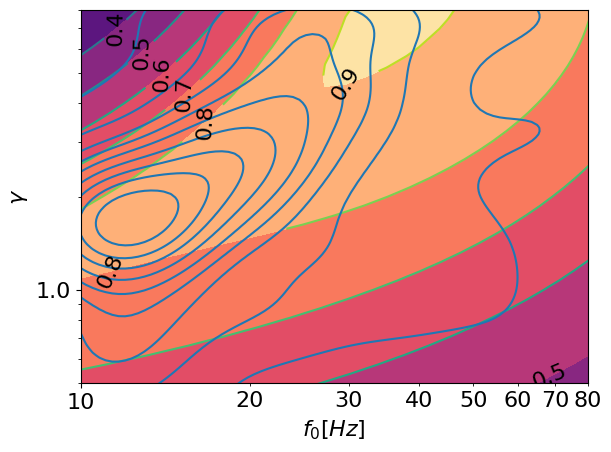

In [19]:
f0res=np.array(dfmatch['f0']).reshape(50,51)
bgres=np.array(dfmatch['gbw']).reshape(50,51)
matchres=np.array(dfmatch['match']).reshape(50,51)
fig,ax=plt.subplots()
cs1= ax.contourf(f0res,bgres,matchres,cmap="magma")
cs = ax.contour(f0res,bgres,matchres,levels=np.arange(0,1.1,0.1))
# cs = plt.contour(f0res,bgres,matchres,levels=6)
ax.clabel(cs,colors='k')
#plt.scatter(df3['f0'], df3['gbw'], c=df3['match'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$f_0 [Hz]$', fontsize=16);
plt.ylabel('$\gamma$', fontsize=16);
plt.xlim(10,80)
plt.ylim(0.5,8)
# plt.colorbar(cs,cax=ax)
sns.kdeplot(df.query("(ml_label == 'Tomte' or ml_label == 'Blip_Low_Frequency')"),
                x='frequency', y='gbw',
                log_scale=True, common_norm=False, ax=ax,palette="muted")
# ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_minor_formatter(mticker.FormatStrFormatter('%d'))
# cbar = fig.colorbar(cs1)
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
# cbar = fig.colorbar(cs1)
plt.minorticks_on()
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.savefig("BestMatchTomteDistribL1H1.png")

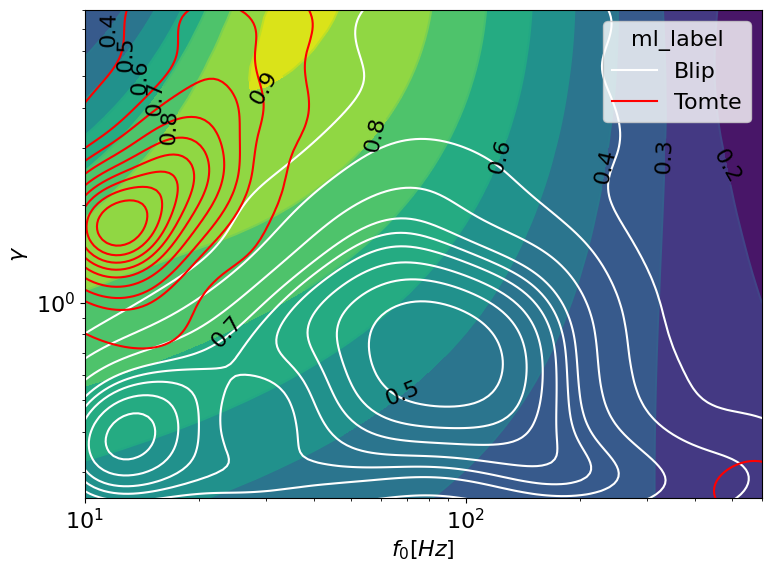

In [53]:
f0res=np.array(dfmatch['f0']).reshape(50,51)
bgres=np.array(dfmatch['gbw']).reshape(50,51)
matchres=np.array(dfmatch['match']).reshape(50,51)
fig,ax=plt.subplots(figsize=(8,6))
cs1= ax.contourf(f0res,bgres,matchres,cmap="viridis")
cs = ax.contour(f0res,bgres,matchres,levels=np.arange(0,1.1,0.1))
# cs = plt.contour(f0res,bgres,matchres,levels=6)
ax.clabel(cs,colors='k')
#plt.scatter(df3['f0'], df3['gbw'], c=df3['match'])
plt.xlabel('$f_0 [Hz]$', fontsize=16);
plt.ylabel('$\gamma$', fontsize=16);
plt.xlim(10,600)
plt.ylim(0.25,8)
# plt.colorbar(cs,cax=ax)
sns.kdeplot(df.query("ifo!= 'V1' and (ml_label == 'Tomte' or ml_label == 'Blip')"),
                x='frequency', y='gbw',
                hue='ml_label',
                log_scale=True, common_norm=False, ax=ax,palette=['w','r'])
#ax.xaxis.grid(True, which='minor')
#ax.yaxis.grid(True, which='minor')
plt.minorticks_on()
# locmin = mticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
# ax.xaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(mticker.NullFormatter())
# ax.yaxis.set_minor_locator(locmin)
# ax.yaxis.set_minor_formatter(mticker.NullFormatter())
# ax.tick_params(axis="both", direction="in", which="both", right=False, top=True)
plt.tight_layout()
plt.savefig("BestMatchBlipTomteDistribL1H1.png")
# ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.1f'))
# ax.xaxis.set_minor_formatter(mticker.FormatStrFormatter('%d'))
# cbar = fig.colorbar(cs1)
# ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
# ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
 # cbar = fig.colorbar(cs1)

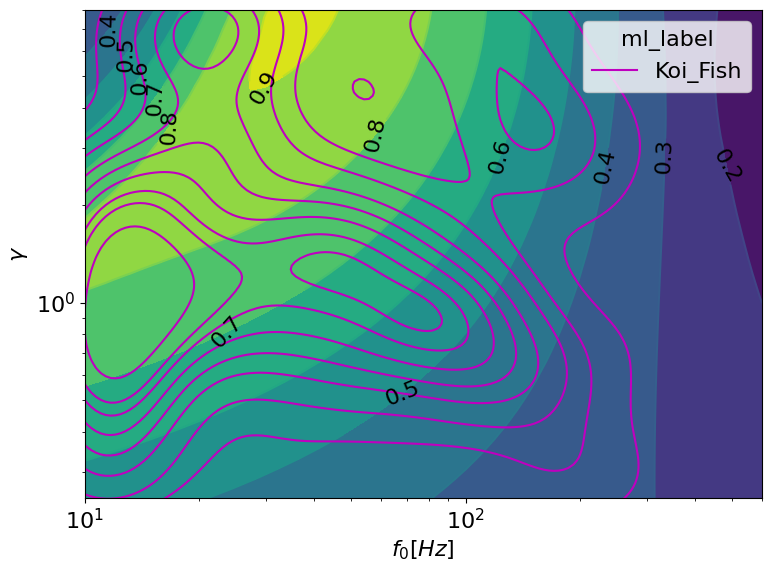

In [54]:
f0res=np.array(dfmatch['f0']).reshape(50,51)
bgres=np.array(dfmatch['gbw']).reshape(50,51)
matchres=np.array(dfmatch['match']).reshape(50,51)
fig,ax=plt.subplots(figsize=(8,6))
cs1= ax.contourf(f0res,bgres,matchres,cmap="viridis")
cs = ax.contour(f0res,bgres,matchres,levels=np.arange(0,1.1,0.1))
# cs = plt.contour(f0res,bgres,matchres,levels=6)
ax.clabel(cs,colors='k')
#plt.scatter(df3['f0'], df3['gbw'], c=df3['match'])
plt.xlabel('$f_0 [Hz]$', fontsize=16);
plt.ylabel('$\gamma$', fontsize=16);
plt.xlim(10,600)
plt.ylim(0.25,8)
# plt.colorbar(cs,cax=ax)
sns.kdeplot(df.query("ifo!= 'V1' and (ml_label == 'Koi_Fish')"),
                x='frequency', y='gbw',
                hue='ml_label',
                log_scale=True, common_norm=False, ax=ax,palette=['m'])
#ax.xaxis.grid(True, which='minor')
#ax.yaxis.grid(True, which='minor')
plt.minorticks_on()
# locmin = mticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
# ax.xaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(mticker.NullFormatter())
# ax.yaxis.set_minor_locator(locmin)
# ax.yaxis.set_minor_formatter(mticker.NullFormatter())
# ax.tick_params(axis="both", direction="in", which="both", right=False, top=True)
plt.tight_layout()
plt.savefig("BestMatchKoiDistribL1H1.png")
# ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.1f'))
# ax.xaxis.set_minor_formatter(mticker.FormatStrFormatter('%d'))
# cbar = fig.colorbar(cs1)
# ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
# ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
 # cbar = fig.colorbar(cs1)

/var/folders/9r/2rjfr67j39153lp1r6y1_jym0000gr/T/ipykernel_84183/3718074126.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(dfold.query("ifo!= 'V1' and (ml_label == 'Blip')"),


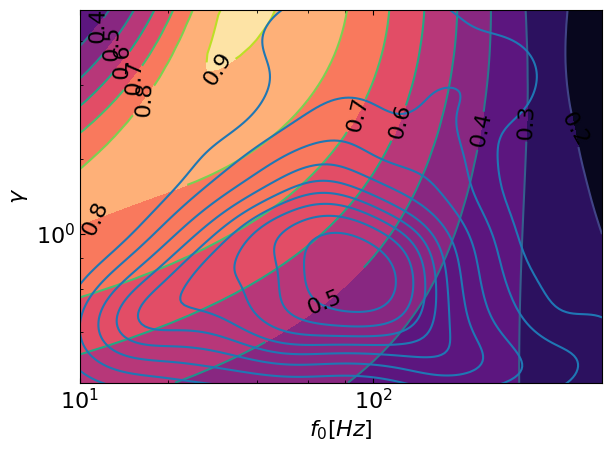

In [18]:
f0res=np.array(dfmatch['f0']).reshape(50,51)
bgres=np.array(dfmatch['gbw']).reshape(50,51)
matchres=np.array(dfmatch['match']).reshape(50,51)
fig,ax=plt.subplots()
cs1= ax.contourf(f0res,bgres,matchres,cmap="magma")
cs = ax.contour(f0res,bgres,matchres,levels=np.arange(0,1.1,0.1))
# cs = plt.contour(f0res,bgres,matchres,levels=6)
ax.clabel(cs,colors='k')
#plt.scatter(df3['f0'], df3['gbw'], c=df3['match'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$f_0 [Hz]$', fontsize=16);
plt.ylabel('$\gamma$', fontsize=16);
plt.xlim(10,600)
plt.ylim(0.25,8)
# plt.colorbar(cs,cax=ax)
sns.kdeplot(dfold.query("ifo!= 'V1' and (ml_label == 'Blip')"),
                x='frequency', y='gbw',
                log_scale=True, common_norm=False, ax=ax,palette="muted")
#ax.xaxis.grid(True, which='minor')
#ax.yaxis.grid(True, which='minor')
plt.minorticks_on()
locmin = mticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mticker.NullFormatter())
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mticker.NullFormatter())
ax.tick_params(axis="both", direction="in", which="both", right=False, top=True)
plt.tight_layout()
plt.savefig("BestMatchBlipDistribL1H1.png")
# ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.1f'))
# ax.xaxis.set_minor_formatter(mticker.FormatStrFormatter('%d'))
# cbar = fig.colorbar(cs1)
# ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
# ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
 # cbar = fig.colorbar(cs1)

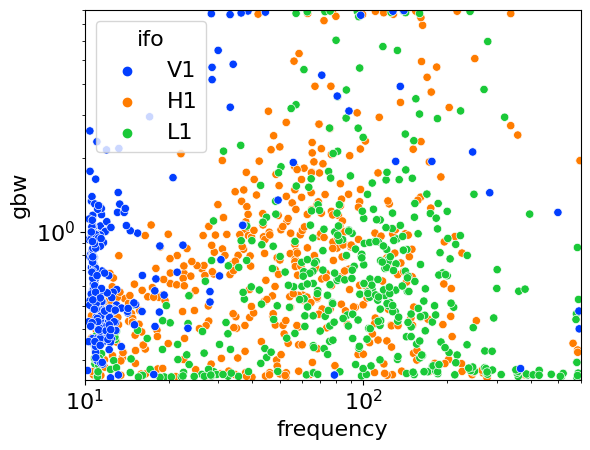

In [55]:
sns.scatterplot(df.query("(ml_label == 'Blip')"),
                    x = 'frequency', y='gbw',
                    hue='ifo', hue_order=['V1', 'H1', 'L1'])
plt.xlim(10,600)
plt.ylim(0.25,8)
plt.xscale('log')
plt.yscale('log')

/var/folders/9r/2rjfr67j39153lp1r6y1_jym0000gr/T/ipykernel_63085/3201887095.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df.query("ifo!= 'V1' and (ml_label == 'Koi_Fish')"),


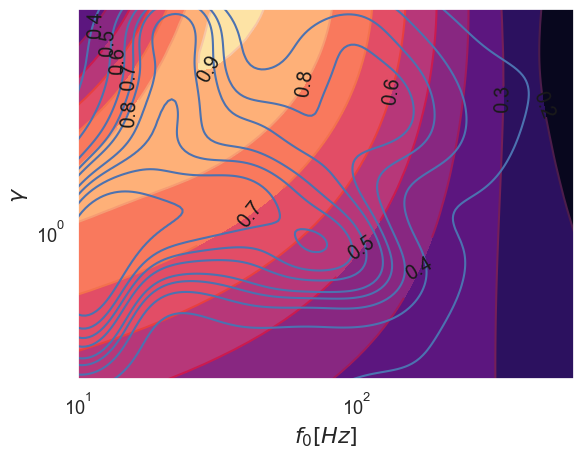

In [628]:
f0res=np.array(dfmatch['f0']).reshape(50,51)
bgres=np.array(dfmatch['gbw']).reshape(50,51)
matchres=np.array(dfmatch['match']).reshape(50,51)
fig,ax=plt.subplots()
cs1= ax.contourf(f0res,bgres,matchres,cmap="magma")
cs = ax.contour(f0res,bgres,matchres,levels=np.arange(0,1.1,0.1))
# cs = plt.contour(f0res,bgres,matchres,levels=6)
ax.clabel(cs,colors='k')
#plt.scatter(df3['f0'], df3['gbw'], c=df3['match'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$f_0 [Hz]$', fontsize=16);
plt.ylabel('$\gamma$', fontsize=16);
plt.xlim(10,600)
plt.ylim(0.25,8)
# plt.colorbar(cs,cax=ax)
sns.kdeplot(df.query("ifo!= 'V1' and (ml_label == 'Koi_Fish')"),
                x='frequency', y='gbw',
                log_scale=True, common_norm=False, ax=ax,palette="muted")
#ax.xaxis.grid(True, which='minor')
#ax.yaxis.grid(True, which='minor')
plt.minorticks_on()
locmin = mticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mticker.NullFormatter())
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mticker.NullFormatter())
# ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.1f'))
# ax.xaxis.set_minor_formatter(mticker.FormatStrFormatter('%d'))
# cbar = fig.colorbar(cs1)
# ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
# ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
 # cbar = fig.colorbar(cs1)

/var/folders/9r/2rjfr67j39153lp1r6y1_jym0000gr/T/ipykernel_6919/3201887095.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df.query("ifo!= 'V1' and (ml_label == 'Koi_Fish')"),


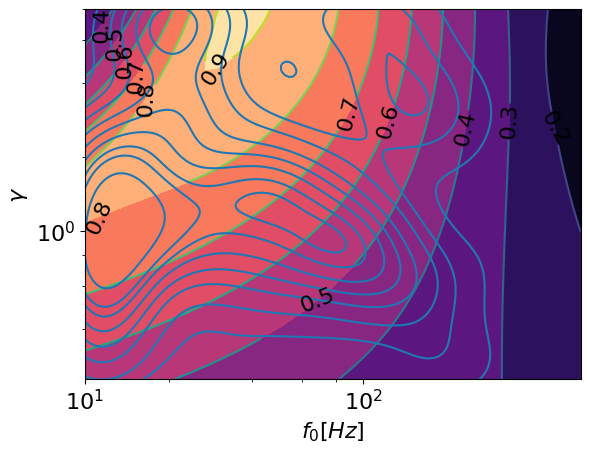

In [34]:
f0res=np.array(dfmatch['f0']).reshape(50,51)
bgres=np.array(dfmatch['gbw']).reshape(50,51)
matchres=np.array(dfmatch['match']).reshape(50,51)
fig,ax=plt.subplots()
cs1= ax.contourf(f0res,bgres,matchres,cmap="magma")
cs = ax.contour(f0res,bgres,matchres,levels=np.arange(0,1.1,0.1))
# cs = plt.contour(f0res,bgres,matchres,levels=6)
ax.clabel(cs,colors='k')
#plt.scatter(df3['f0'], df3['gbw'], c=df3['match'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$f_0 [Hz]$', fontsize=16);
plt.ylabel('$\gamma$', fontsize=16);
plt.xlim(10,600)
plt.ylim(0.25,8)
# plt.colorbar(cs,cax=ax)
sns.kdeplot(df.query("ifo!= 'V1' and (ml_label == 'Koi_Fish')"),
                x='frequency', y='gbw',
                log_scale=True, common_norm=False, ax=ax,palette="muted")
#ax.xaxis.grid(True, which='minor')
#ax.yaxis.grid(True, which='minor')
plt.minorticks_on()
locmin = mticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mticker.NullFormatter())
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mticker.NullFormatter())
# ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.1f'))
# ax.xaxis.set_minor_formatter(mticker.FormatStrFormatter('%d'))
# cbar = fig.colorbar(cs1)
# ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
# ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
 # cbar = fig.colorbar(cs1)

/var/folders/9r/2rjfr67j39153lp1r6y1_jym0000gr/T/ipykernel_6919/1553112195.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df.query("ifo== 'V1' and (ml_label != 'Koi_Fish')"),


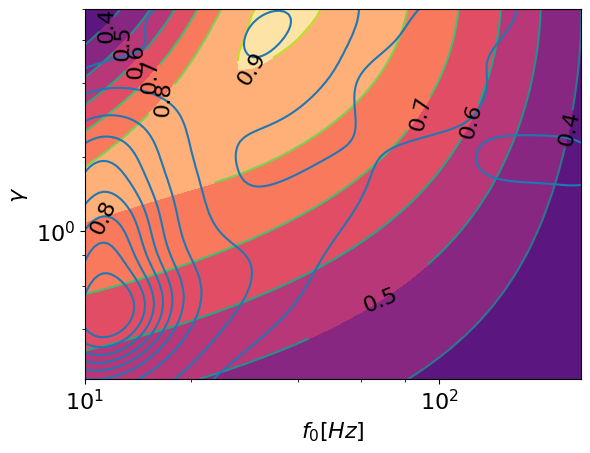

In [44]:
f0res=np.array(dfmatch['f0']).reshape(50,51)
bgres=np.array(dfmatch['gbw']).reshape(50,51)
matchres=np.array(dfmatch['match']).reshape(50,51)
fig,ax=plt.subplots()
cs1= ax.contourf(f0res,bgres,matchres,cmap="magma")
cs = ax.contour(f0res,bgres,matchres,levels=np.arange(0,1.1,0.1))
# cs = plt.contour(f0res,bgres,matchres,levels=6)
ax.clabel(cs,colors='k')
#plt.scatter(df3['f0'], df3['gbw'], c=df3['match'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$f_0 [Hz]$', fontsize=16);
plt.ylabel('$\gamma$', fontsize=16);
plt.xlim(10,250)
plt.ylim(0.25,8)
# plt.colorbar(cs,cax=ax)
sns.kdeplot(df.query("ifo== 'V1' and (ml_label != 'Koi_Fish')"),
                x='frequency', y='gbw',
                log_scale=True, common_norm=False, ax=ax,palette="muted")
#ax.xaxis.grid(True, which='minor')
#ax.yaxis.grid(True, which='minor')
plt.minorticks_on()
locmin = mticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mticker.NullFormatter())
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mticker.NullFormatter())
# ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.1f'))
# ax.xaxis.set_minor_formatter(mticker.FormatStrFormatter('%d'))
# cbar = fig.colorbar(cs1)
# ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
# ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
 # cbar = fig.colorbar(cs1)

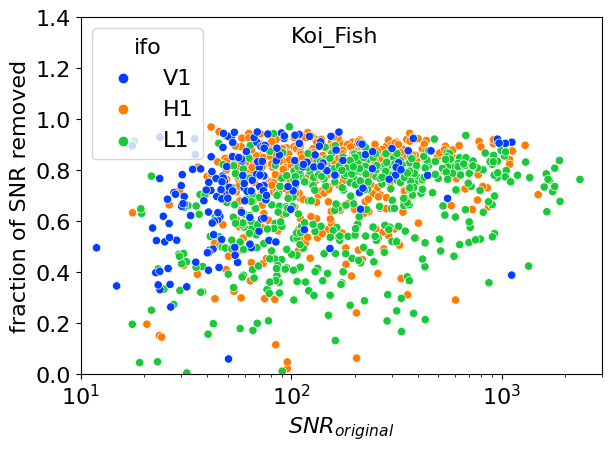

In [70]:
figure=sns.scatterplot(df.query("ml_label == 'Koi_Fish'"),
                    x = 'snr_original', y='fraction',
                    hue='ifo', hue_order=['V1', 'H1', 'L1'])
plt.xlim(10,3000)
plt.ylim(0.0,1.4)
plt.xlabel('$SNR_{original}$', fontsize=16);
plt.ylabel('fraction of SNR removed', fontsize=16);
plt.xscale('log')
figure.text(100,1.3, "Koi_Fish")
plt.tight_layout()
plt.savefig('SNRFractionKoiFish.png')

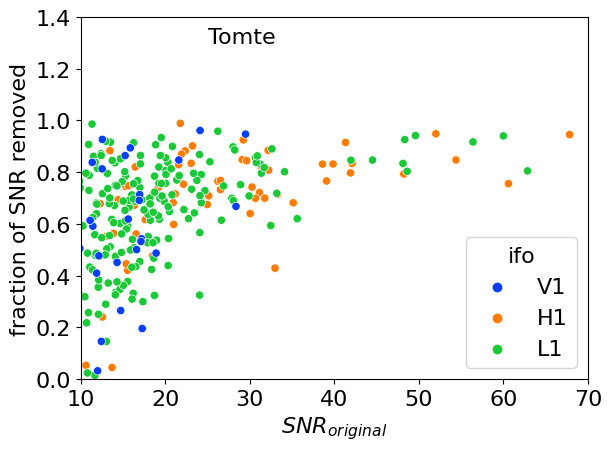

In [69]:
figure=sns.scatterplot(df.query("ml_label == 'Tomte'"),
                    x = 'snr_original', y='fraction',
                    hue='ifo', hue_order=['V1', 'H1', 'L1'])
plt.xlim(10,70)
plt.ylim(0.0,1.4)
plt.xlabel('$SNR_{original}$', fontsize=16);
plt.ylabel('fraction of SNR removed', fontsize=16);
# plt.xscale('log')
figure.text(25,1.3, "Tomte")
plt.tight_layout()
plt.savefig('SNRFractionTomte.png')

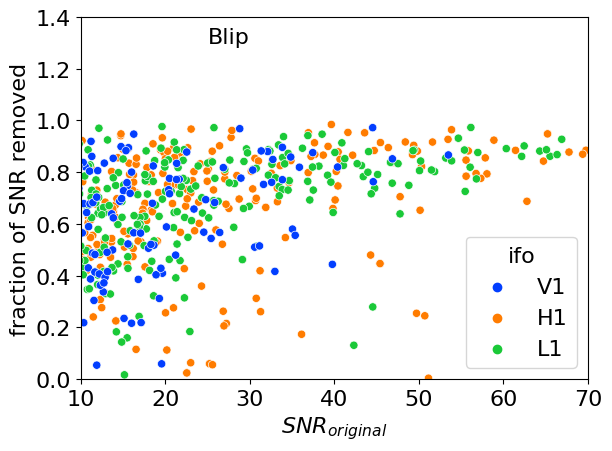

In [68]:
figure=sns.scatterplot(df.query("ml_label == 'Blip'"),
                    x = 'snr_original', y='fraction',
                    hue='ifo', hue_order=['V1', 'H1', 'L1'])
plt.xlim(10,70)
plt.ylim(0.0,1.4)
plt.xlabel('$SNR_{original}$', fontsize=16);
plt.ylabel('fraction of SNR removed', fontsize=16);
figure.text(25,1.3, "Blip")
# plt.xscale('log')
plt.tight_layout()
plt.savefig('SNRFractionBlip.png')

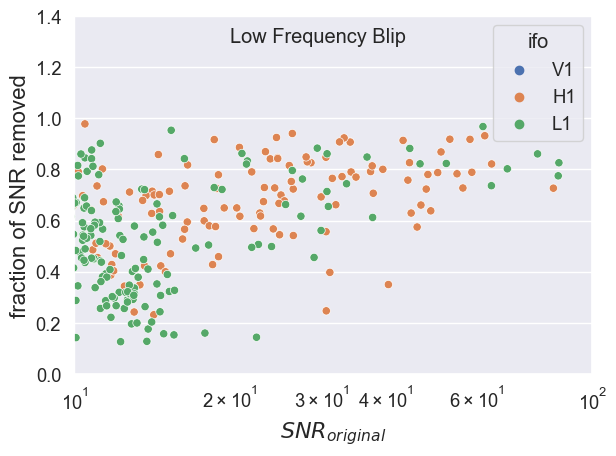

In [294]:
figure=sns.scatterplot(df.query("ml_label == 'Blip_Low_Frequency'"),
                    x = 'snr_original', y='fraction',
                    hue='ifo', hue_order=['V1', 'H1', 'L1'])
plt.xlim(10,100)
plt.ylim(0.0,1.4)
plt.xlabel('$SNR_{original}$', fontsize=16);
plt.ylabel('fraction of SNR removed', fontsize=16);
plt.xscale('log')
figure.text(20,1.3, "Low Frequency Blip")
plt.tight_layout()
plt.savefig('SNRFractionLFBlip.png')

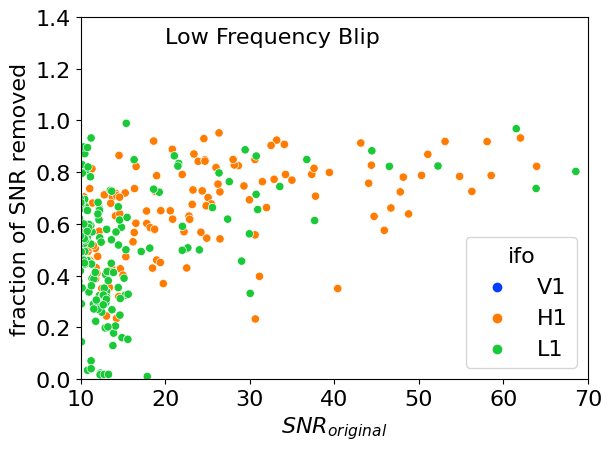

In [67]:
figure=sns.scatterplot(df.query("ml_label == 'Blip_Low_Frequency'"),
                    x = 'snr_original', y='fraction',
                    hue='ifo', hue_order=['V1', 'H1', 'L1'])
plt.xlim(10,70)
plt.ylim(0.0,1.4)
plt.xlabel('$SNR_{original}$', fontsize=16);
plt.ylabel('fraction of SNR removed', fontsize=16);
# plt.xscale('log')
figure.text(20,1.3, "Low Frequency Blip")
plt.tight_layout()
plt.savefig('SNRFractionLFBlip.png')

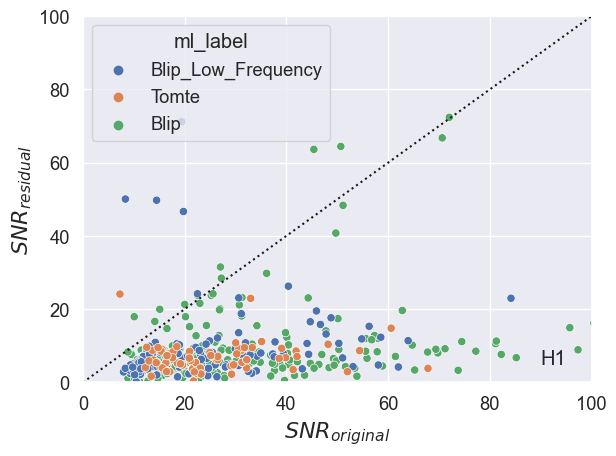

In [240]:
figure=sns.scatterplot(df.query("ifo == 'H1' and ml_label!= 'Koi_Fish'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100], c='k', ls=':')
plt.xlabel('$SNR_{original}$', fontsize=16);
plt.ylabel('$SNR_{residual}$', fontsize=16);
figure.text(90,5, "H1", rotation= 0)
plt.tight_layout()
plt.savefig('SNRH1OOriginalResidual.png')

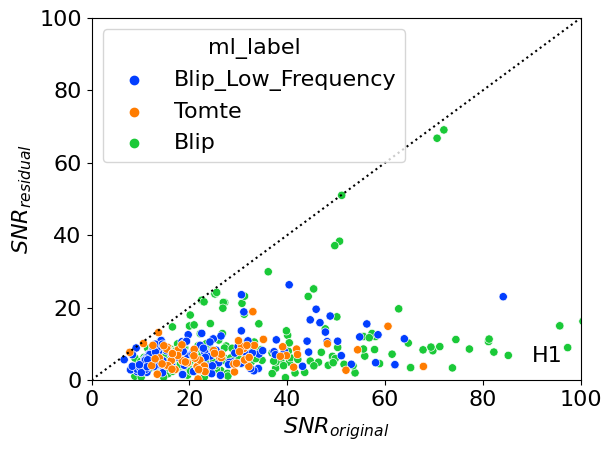

In [57]:
figure=sns.scatterplot(df.query("ifo == 'H1' and ml_label!= 'Koi_Fish'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100], c='k', ls=':')
plt.xlabel('$SNR_{original}$', fontsize=16);
plt.ylabel('$SNR_{residual}$', fontsize=16);
figure.text(90,5, "H1", rotation= 0)
plt.tight_layout()
plt.savefig('SNRH1OOriginalResidual.png')

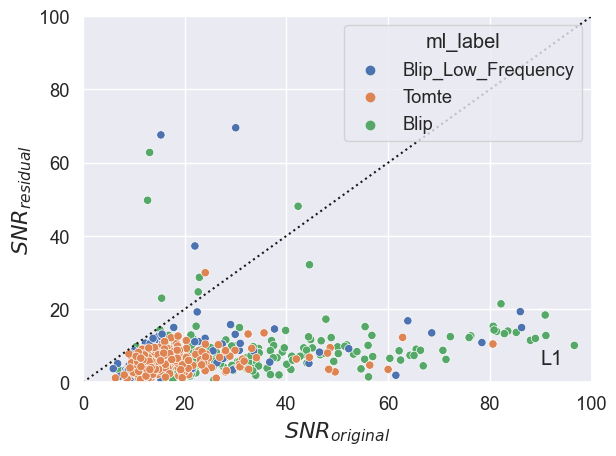

In [193]:
figure=sns.scatterplot(df.query("ifo == 'L1' and ml_label!= 'Koi_Fish'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100], c='k', ls=':')
plt.xlabel('$SNR_{original}$', fontsize=16);
plt.ylabel('$SNR_{residual}$', fontsize=16);
figure.text(90,5, "L1", rotation= 0)
plt.tight_layout()
plt.savefig('SNRL1OOriginalResidual.png')

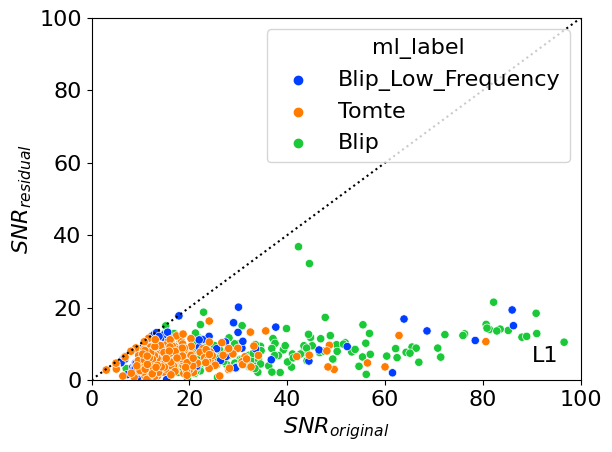

In [56]:
figure=sns.scatterplot(df.query("ifo == 'L1' and ml_label!= 'Koi_Fish'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100], c='k', ls=':')
plt.xlabel('$SNR_{original}$', fontsize=16);
plt.ylabel('$SNR_{residual}$', fontsize=16);
figure.text(90,5, "L1", rotation= 0)
plt.tight_layout()
plt.savefig('SNRL1OOriginalResidual.png')

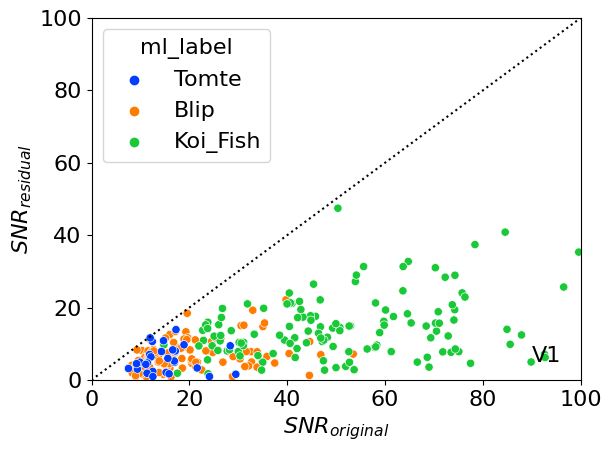

In [58]:
figure=sns.scatterplot(df.query("ifo == 'V1' and ml_label"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Tomte','Blip','Koi_Fish'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100], c='k', ls=':')
plt.xlabel('$SNR_{original}$', fontsize=16);
plt.ylabel('$SNR_{residual}$', fontsize=16);
figure.text(90,5, "V1", rotation= 0)
plt.tight_layout()
plt.savefig('SNRV1OOriginalResidual.png')

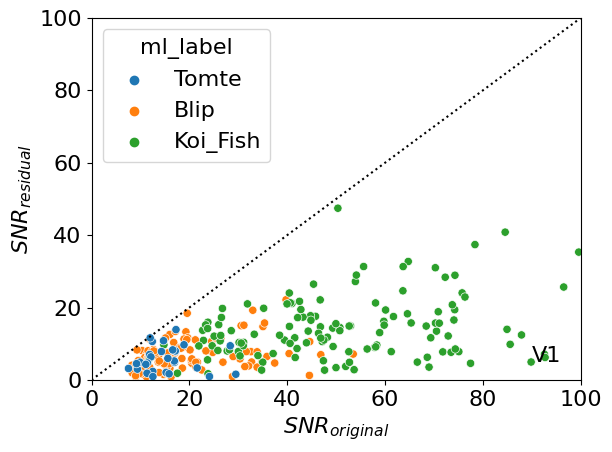

In [62]:
figure=sns.scatterplot(df.query("ifo == 'V1' and ml_label"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Tomte','Blip','Koi_Fish'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100], c='k', ls=':')
plt.xlabel('$SNR_{original}$', fontsize=16);
plt.ylabel('$SNR_{residual}$', fontsize=16);
figure.text(90,5, "V1", rotation= 0)
plt.tight_layout()
plt.savefig('SNRV1OOriginalResidual.png')

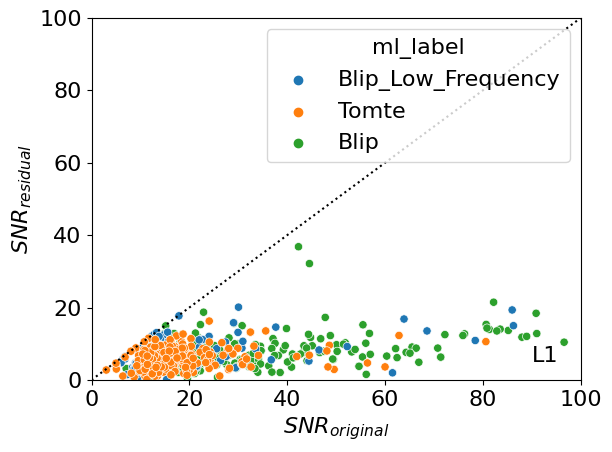

In [61]:
figure=sns.scatterplot(df.query("ifo == 'L1' and ml_label!= 'Koi_Fish'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100], c='k', ls=':')
plt.xlabel('$SNR_{original}$', fontsize=16);
plt.ylabel('$SNR_{residual}$', fontsize=16);
figure.text(90,5, "L1", rotation= 0)
plt.tight_layout()
plt.savefig('SNRL1OOriginalResidual.png')

<AxesSubplot: xlabel='power', ylabel='Count'>

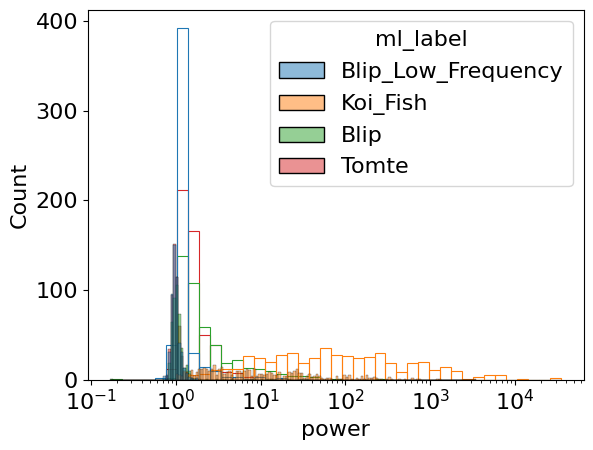

In [29]:
sns.histplot(df.query("ifo == 'L1'"), x='power', hue='ml_label', hue_order=ml_types[::-1], log_scale=True,fill=False)
sns.histplot(df.query("ifo == 'L1'"), x='residual', hue='ml_label', hue_order=ml_types[::-1], log_scale=True,fill=True)

<AxesSubplot: xlabel='power', ylabel='Count'>

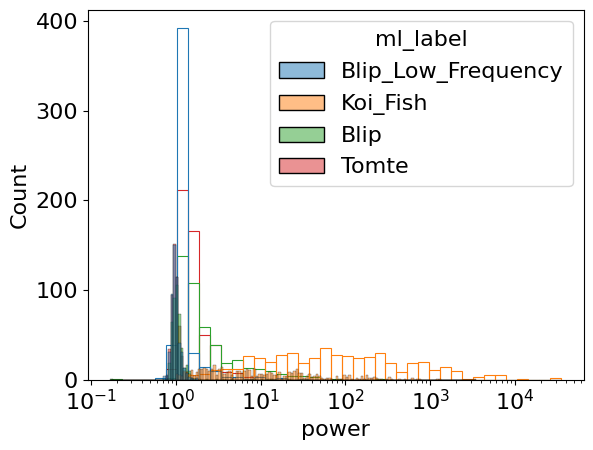

In [63]:
sns.histplot(df.query("ifo == 'L1'"), x='power', hue='ml_label', hue_order=ml_types[::-1], log_scale=True,fill=False)
sns.histplot(df.query("ifo == 'L1'"), x='residual', hue='ml_label', hue_order=ml_types[::-1], log_scale=True,fill=True)

<AxesSubplot: xlabel='residual', ylabel='Count'>

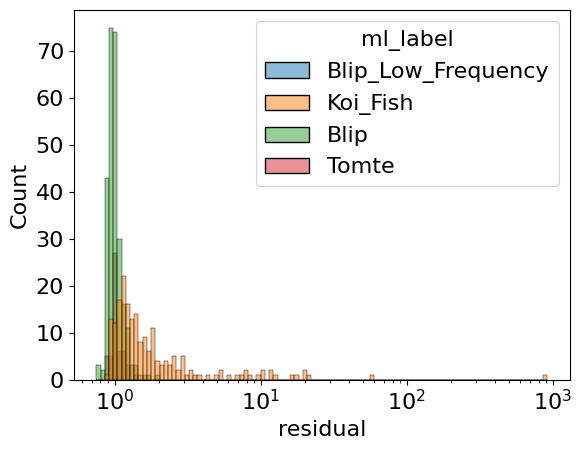

In [32]:
sns.histplot(df.query("ifo == 'V1'"), x='residual', hue='ml_label', hue_order=ml_types[::-1], log_scale=True)

<AxesSubplot: xlabel='residual', ylabel='Count'>

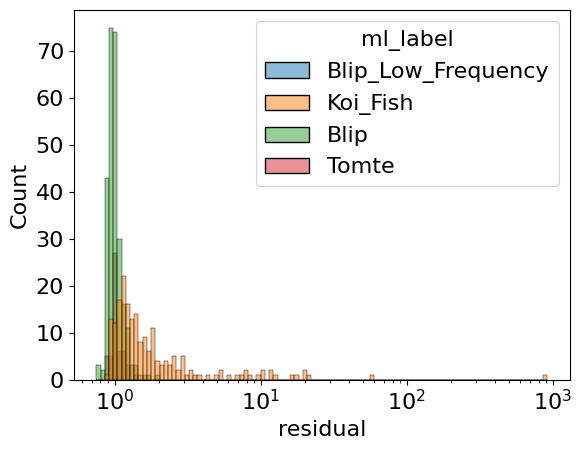

In [64]:
sns.histplot(df.query("ifo == 'V1'"), x='residual', hue='ml_label', hue_order=ml_types[::-1], log_scale=True)

<AxesSubplot: xlabel='power', ylabel='Count'>

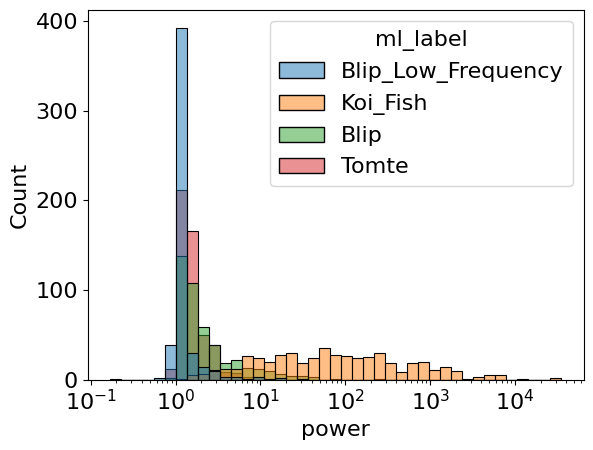

In [33]:
sns.histplot(df.query("ifo == 'L1'"), x='power', hue='ml_label', hue_order=ml_types[::-1], log_scale=True)

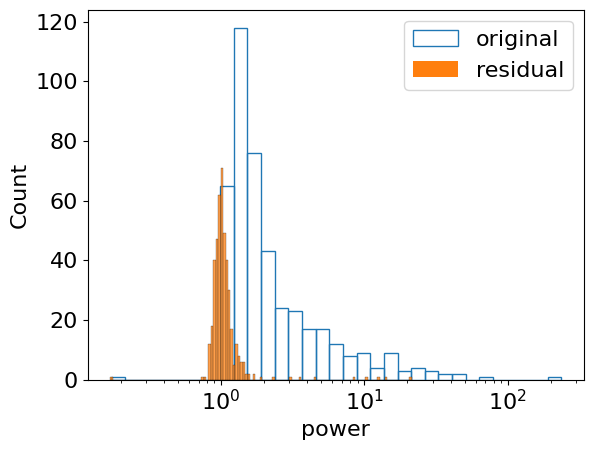

In [34]:
fig = plt.figure()
sns.histplot(df.query("ifo == 'L1' and ml_label=='Blip'"), x='power',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'L1' and ml_label=='Blip'"), x='residual',  log_scale=True, fill=True)
fig.gca().legend(labels=['original','residual'])

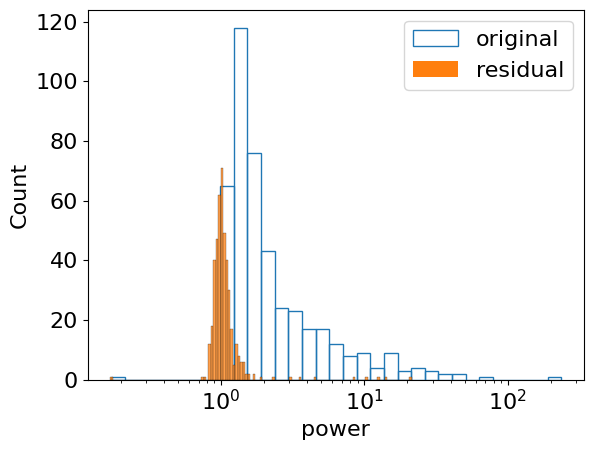

In [65]:
fig = plt.figure()
sns.histplot(df.query("ifo == 'L1' and ml_label=='Blip'"), x='power',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'L1' and ml_label=='Blip'"), x='residual',  log_scale=True, fill=True)
fig.gca().legend(labels=['original','residual'])

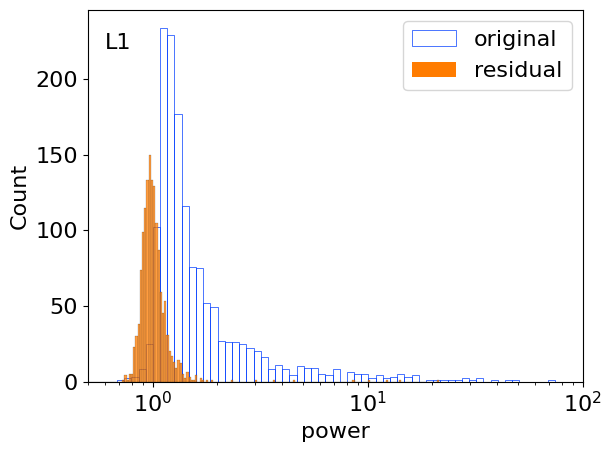

In [71]:
fig = plt.figure()
sns.histplot(df.query("ifo == 'L1' and ml_label!='Koi_Fish'"), x='power',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'L1' and ml_label!='Koi_Fish'"), x='residual',  log_scale=True, fill=True)
plt.ylabel('Count', fontsize=16);
plt.xlabel('power', fontsize=16);
fig.gca().set_xlim(0.5, 100)
fig.gca().text(0.6,220, "L1", rotation= 0)
fig.gca().legend(labels=['original','residual'])
plt.tight_layout()
plt.savefig('ResidualPowerL1.png')

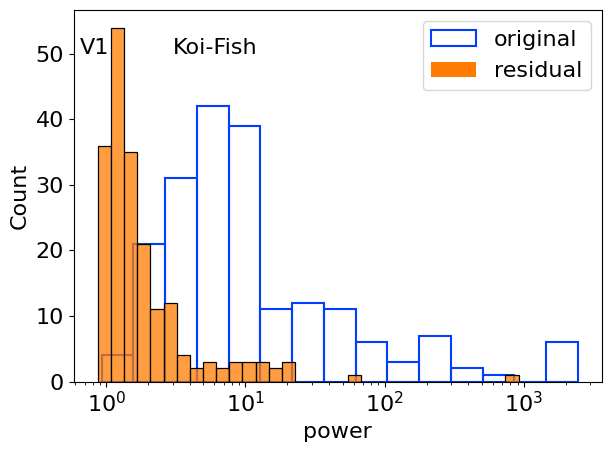

In [98]:
fig = plt.figure()
sns.histplot(df.query("ifo == 'V1' and ml_label=='Koi_Fish'"), x='power',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'V1' and ml_label=='Koi_Fish'"), x='residual',  log_scale=True, fill=True)
plt.ylabel('Count', fontsize=16);
plt.xlabel('power', fontsize=16);
#fig.gca().set_xlim(0.5, 100)
fig.gca().text(0.65,50, "V1", rotation= 0)
fig.gca().text(3,50, "Koi-Fish", rotation= 0)
fig.gca().legend(labels=['original','residual'])
plt.tight_layout()
plt.savefig('ResidualPowerV1Koi.png')

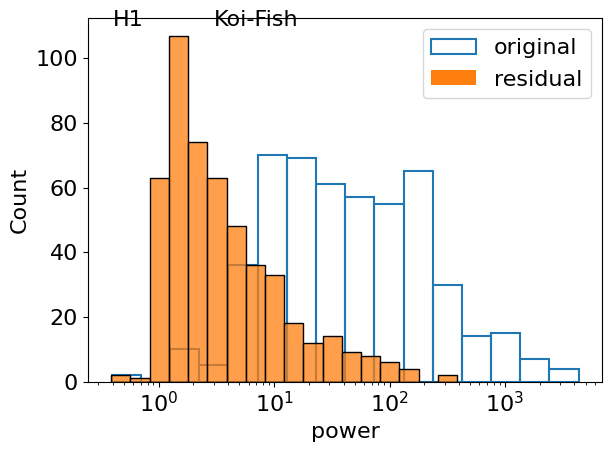

In [69]:
fig = plt.figure()
sns.histplot(df.query("ifo == 'H1' and ml_label=='Koi_Fish'"), x='power',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'H1' and ml_label=='Koi_Fish'"), x='residual',  log_scale=True, fill=True)
plt.ylabel('Count', fontsize=16);
plt.xlabel('power', fontsize=16);
#fig.gca().set_xlim(0.5, 100)
fig.gca().text(0.4,110, "H1", rotation= 0)
fig.gca().text(3,110, "Koi-Fish", rotation= 0)
fig.gca().legend(labels=['original','residual'])
plt.tight_layout()
plt.savefig('ResidualPowerH1Koi.png')

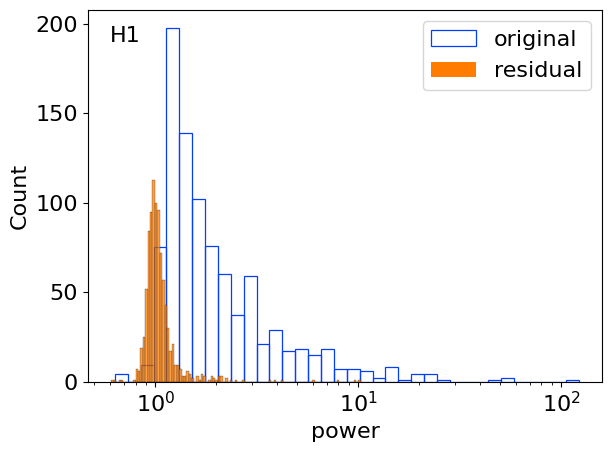

In [72]:
fig = plt.figure()
sns.histplot(df.query("ifo == 'H1' and ml_label!='Koi_Fish'"), x='power',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'H1' and ml_label!='Koi_Fish'"), x='residual',  log_scale=True, fill=True)
plt.ylabel('Count', fontsize=16);
plt.xlabel('power', fontsize=16);
# fig.gca().set_xlim(0.5, 100)
fig.gca().text(0.6,190, "H1", rotation= 0)
fig.gca().legend(labels=['original','residual'])
plt.tight_layout()
plt.savefig('ResidualPowerH1.png')

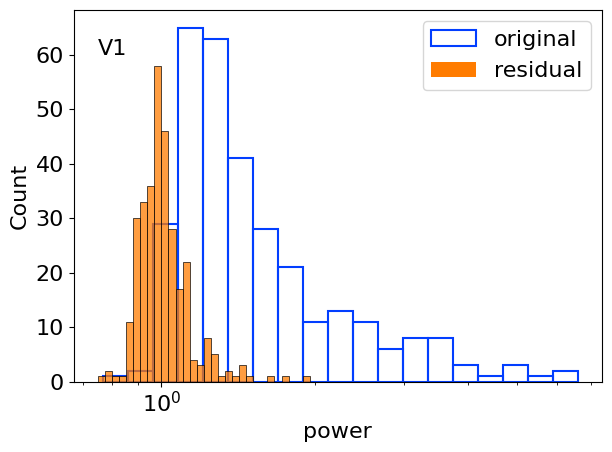

In [88]:
fig = plt.figure()
sns.histplot(df.query("ifo == 'V1' and ml_label !='Koi_Fish'"), x='power',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'V1' and ml_label !='Koi_Fish'"), x='residual',  log_scale=True, fill=True)
plt.ylabel('Count', fontsize=16);
plt.xlabel('power', fontsize=16);
# fig.gca().set_xlim(0.5, 100)
fig.gca().text(0.75,60, "V1", rotation= 0)
fig.gca().legend(labels=['original','residual'])
plt.tight_layout()
plt.savefig('ResidualPowerV1.png')

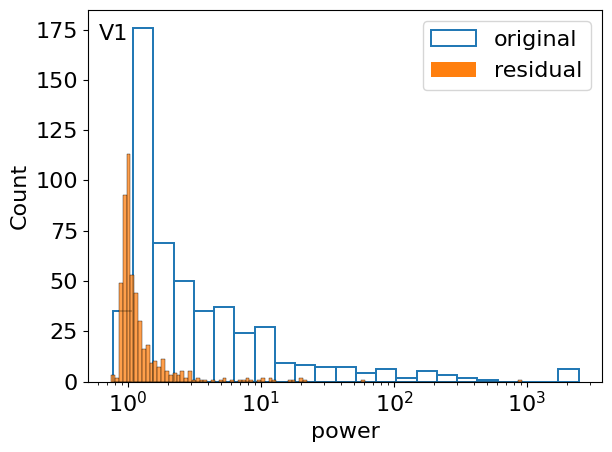

In [70]:
fig = plt.figure()
sns.histplot(df.query("ifo == 'V1' and ml_label"), x='power',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'V1' and ml_label"), x='residual',  log_scale=True, fill=True)
plt.ylabel('Count', fontsize=16);
plt.xlabel('power', fontsize=16);
# fig.gca().set_xlim(0.5, 100)
fig.gca().text(0.6,170, "V1", rotation= 0)
fig.gca().legend(labels=['original','residual'])
plt.tight_layout()
plt.savefig('ResidualPowerV1.png')

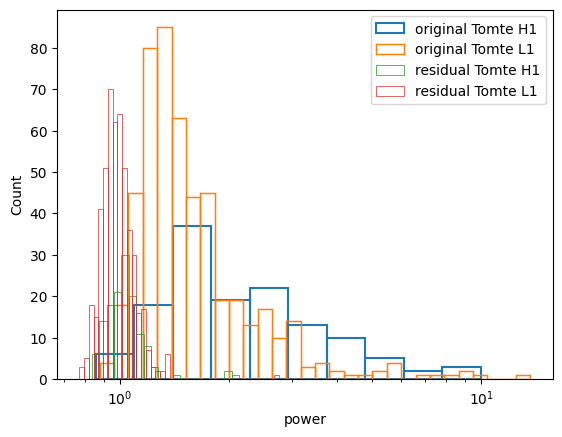

In [115]:
fig = plt.figure()
sns.histplot(df.query("ifo == 'H1' and ml_label=='Tomte'"), x='power',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'L1' and ml_label=='Tomte'"), x='power',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'H1' and ml_label=='Tomte'"), x='residual',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'L1' and ml_label=='Tomte'"), x='residual', log_scale=True,fill=False)
fig.gca().legend(labels=['original Tomte H1','original Tomte L1','residual Tomte H1','residual Tomte L1'])

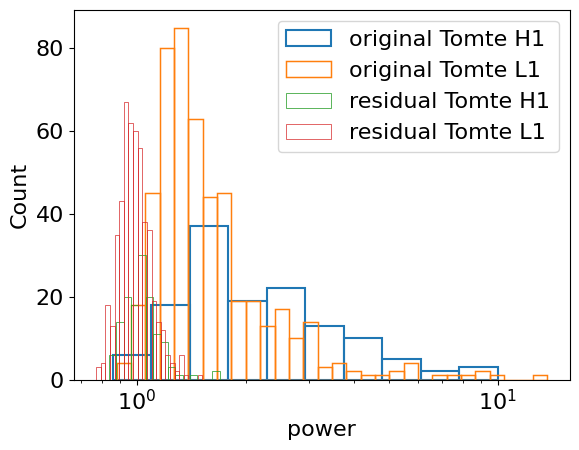

In [71]:
fig = plt.figure()
sns.histplot(df.query("ifo == 'H1' and ml_label=='Tomte'"), x='power',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'L1' and ml_label=='Tomte'"), x='power',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'H1' and ml_label=='Tomte'"), x='residual',  log_scale=True, fill=False)
sns.histplot(df.query("ifo == 'L1' and ml_label=='Tomte'"), x='residual', log_scale=True,fill=False)
fig.gca().legend(labels=['original Tomte H1','original Tomte L1','residual Tomte H1','residual Tomte L1'])

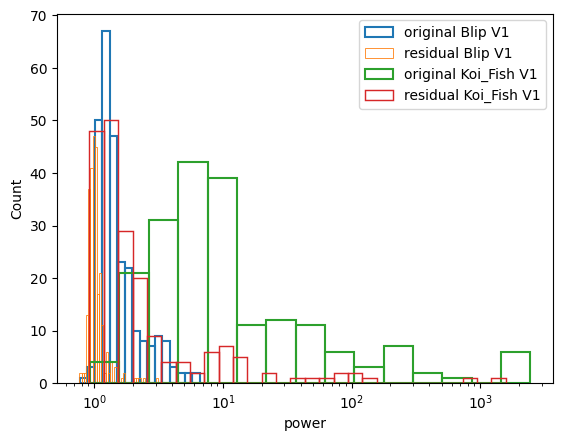

In [110]:
fig = plt.figure()
sns.histplot(df1.query("ifo == 'V1' and ml_label=='Blip'"), x='power',  log_scale=True, fill=False)
sns.histplot(df1.query("ifo == 'V1' and ml_label=='Blip'"), x='residual',  log_scale=True, fill=False)
sns.histplot(df1.query("ifo == 'V1' and ml_label=='Koi_Fish'"), x='power',  log_scale=True, fill=False)
sns.histplot(df1.query("ifo == 'V1' and ml_label=='Koi_Fish'"), x='residual',  log_scale=True, fill=False)
fig.gca().legend(labels=['original Blip V1','residual Blip V1','original Koi_Fish V1','residual Koi_Fish V1'])

<AxesSubplot: xlabel='residual', ylabel='power'>

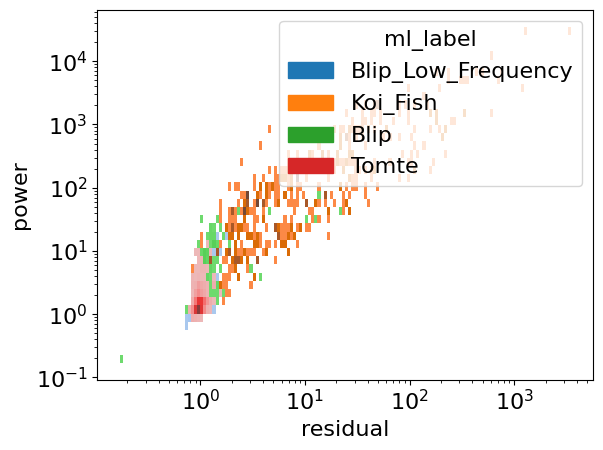

In [72]:
sns.histplot(df.query("ifo == 'L1'"), x='residual', y='power',hue='ml_label', hue_order=ml_types[::-1], log_scale=True, stat="density", common_norm=False)

In [49]:
plt.hist(bins[:-1], bins, weights=counts)

plt.hist(df.query("ifo == 'L1' and ml_label=='Blip'"), x='power',  log_scale=True, fill='false',hue_order=["test"])

TypeError: hist() got multiple values for argument 'x'

<AxesSubplot: xlabel='snr_gs', ylabel='Count'>

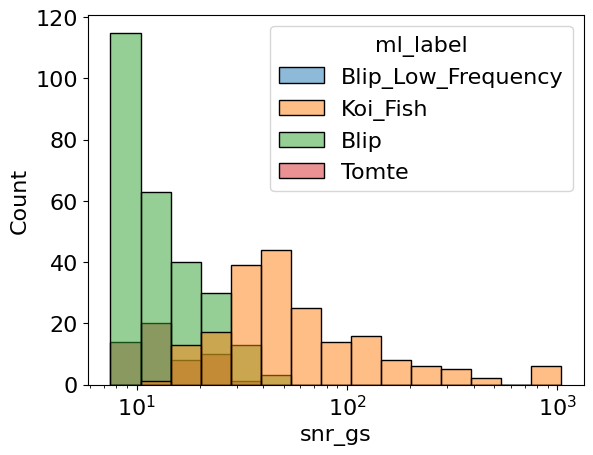

In [73]:
sns.histplot(df.query("ifo == 'V1'"), x='snr_gs', hue='ml_label', hue_order=ml_types[::-1], log_scale=True)

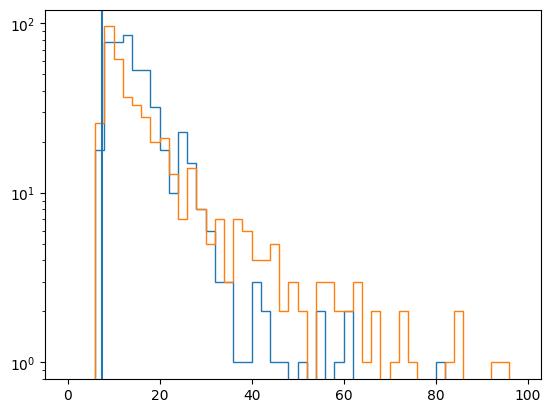

In [24]:
dt = df.query("ifo == 'L1' and ml_label == 'Tomte'")
plt.hist(dt['snr_gs'], bins=np.arange(0,100,2), histtype='step', log=True);
dt = df.query("ifo == 'L1' and ml_label == 'Blip'")
plt.hist(dt['snr_gs'], bins=np.arange(0,100,2), histtype='step', log=True);
plt.axvline(7.5)

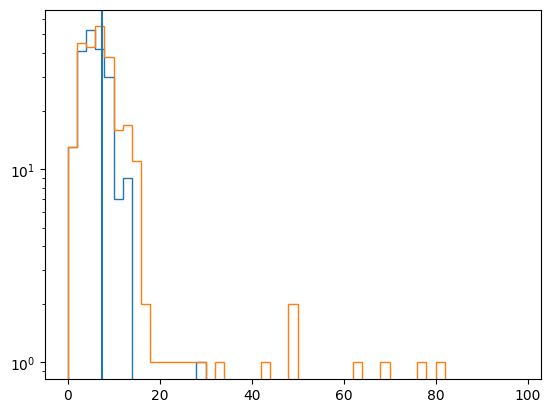

In [42]:
dt = df.query("ifo == 'L1' and ml_label == 'Tomte'")
plt.hist(snr(dt['residual']), bins=np.arange(0,100,2), histtype='step', log=True);
dt = df.query("ifo == 'L1' and ml_label == 'Blip'")
plt.hist(snr(dt['residual']), bins=np.arange(0,100,2), histtype='step', log=True);
plt.axvline(7.5)

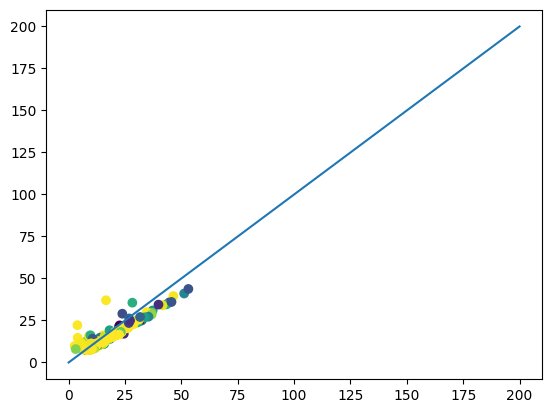

In [13]:
dt = df.query("ifo == 'V1' and ml_label == 'Blip'")
plt.scatter(dt['snr'], dt['snr_gs'], c=dt['ml_confidence'])
plt.plot([0,200],[0,200])
#plt.xscale('log')
#plt.yscale('log')

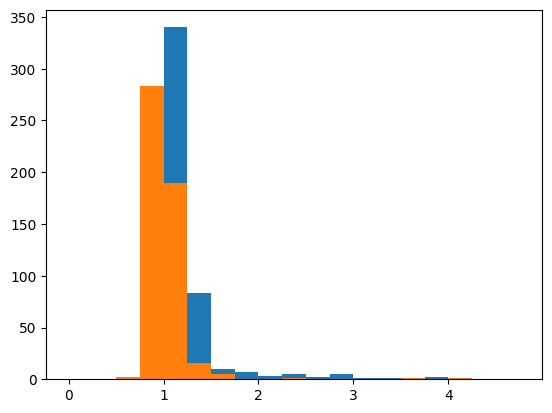

In [29]:
dt = df.query("ifo == 'L1' and ml_label == 'Blip_Low_Frequency'")
plt.hist(dt['power'], bins=np.arange(0,5,0.25));
plt.hist(dt['residual'], bins=np.arange(0,5,0.25));

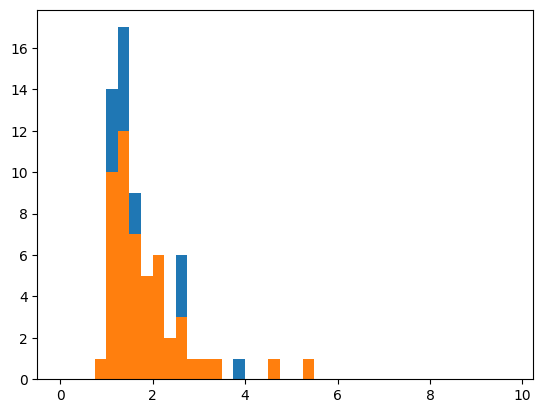

In [30]:
dt = df.query("ifo == 'V1' and ml_label == 'Tomte'")
plt.hist(dt['power'], bins=np.arange(0,10,0.25));
plt.hist(dt['residual'], bins=np.arange(0,10,0.25));

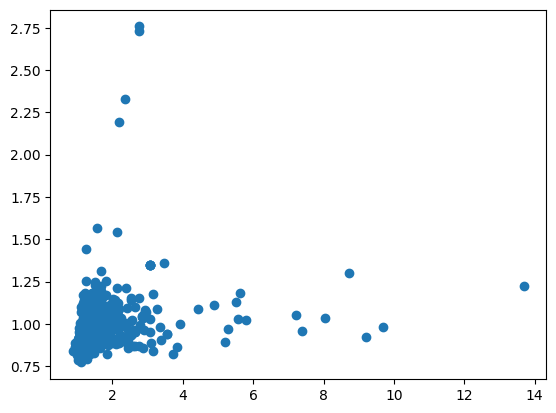

In [37]:
dt = df.query("ifo == 'L1' and ml_label == 'Tomte'")
plt.scatter(dt['power'], dt['residual'])

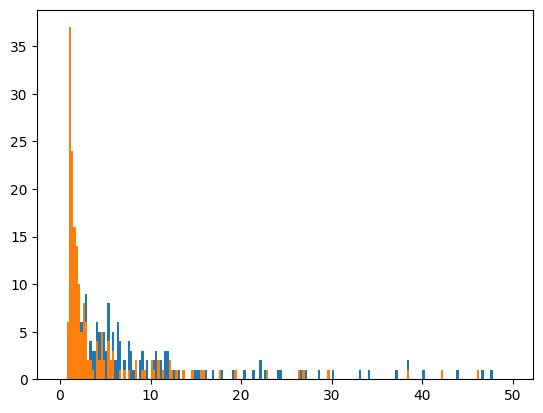

In [241]:

plt.hist(dt['power'], bins=np.arange(0,50,0.25));
plt.hist(dt['residual'], bins=np.arange(0,50,0.25));

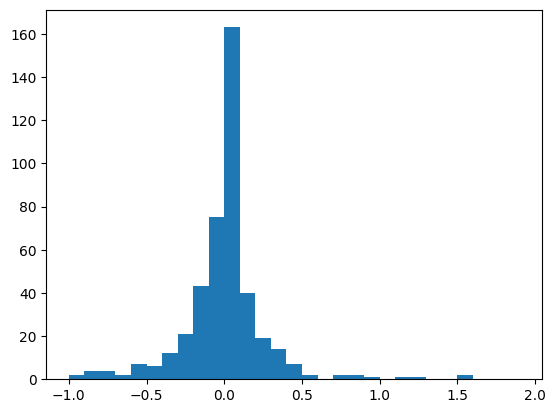

In [47]:
dt = df.query("ifo == 'L1' and ml_label == 'Blip'")
plt.hist((dt['residual']-1.)/(dt['power']-1.), bins=np.arange(-1,2,0.1));

(0.0, 30.0)

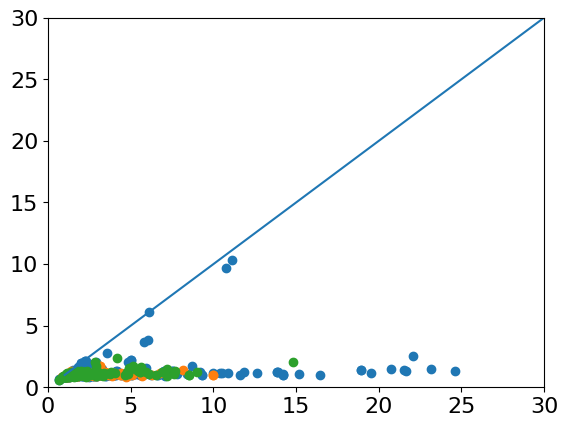

In [74]:
dt = df.query("ifo == 'H1' and ml_label == 'Blip'")
plt.scatter(dt['power'], dt['residual'])
dt = df.query("ifo == 'H1' and ml_label == 'Tomte'")
plt.scatter(dt['power'], dt['residual'])
dt = df.query("ifo == 'H1' and ml_label == 'Blip_Low_Frequency'")
plt.scatter(dt['power'], dt['residual'])
plt.plot([1,30],[1,30])
plt.xlim(0,30)
plt.ylim(0,30)

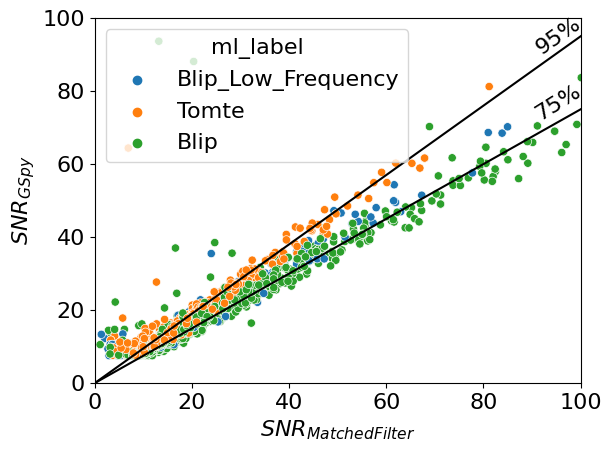

In [38]:
figure=sns.scatterplot(df.query("ml_label != 'Koi_Fish'"),
                    x = 'snr', y='snr_gs',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,95], c='k', ls='-')
plt.plot([0,100],[0,75], c='k', ls='-')
plt.xlabel('$SNR_{Matched Filter}$', fontsize=16);
plt.ylabel('$SNR_{GSpy}$', fontsize=16);
figure.text(90,90, "95%", rotation= 35)
figure.text(90,72, "75%", rotation= 32)
plt.tight_layout()
plt.savefig('SNRGSpyMatched.png')
# sns.set(font_scale=2)
# figure.legend(labels=['0.9','7'])


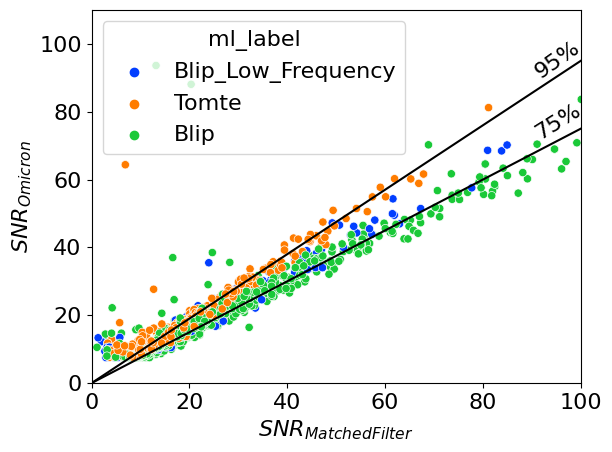

In [80]:
figure=sns.scatterplot(df.query("ml_label != 'Koi_Fish'"),
                    x = 'snr', y='snr_gs',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,100)
plt.ylim(0,110)
plt.plot([0,100],[0,95], c='k', ls='-')
plt.plot([0,100],[0,75], c='k', ls='-')
plt.xlabel('$SNR_{Matched Filter}$', fontsize=16);
plt.ylabel('$SNR_{Omicron}$', fontsize=16);
figure.text(90,90, "95%", rotation= 35)
figure.text(90,72, "75%", rotation= 32)
plt.tight_layout()
plt.savefig('SNRGSpyMatched.png')
# sns.set(font_scale=2)
# figure.legend(labels=['0.9','7'])

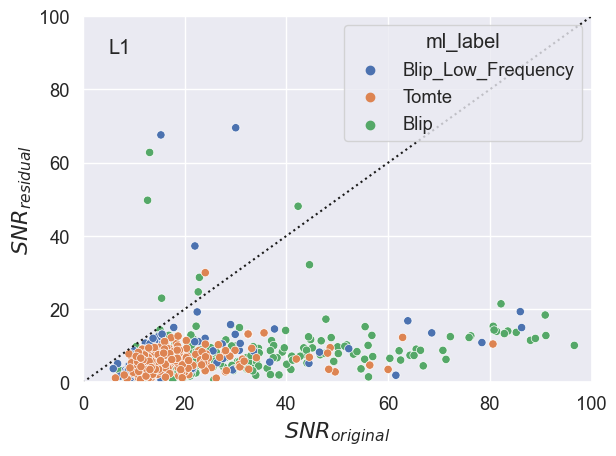

In [179]:
figure=sns.scatterplot(df.query("ifo == 'L1' and ml_label != 'Koi_Fish'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100], c='k', ls=':')
plt.xlabel('$SNR_{original}$', fontsize=16);
plt.ylabel('$SNR_{residual}$', fontsize=16);
figure.text(5,90, "L1", rotation= 0)
plt.tight_layout()
plt.savefig('SNRL1OOriginalResidual.png')

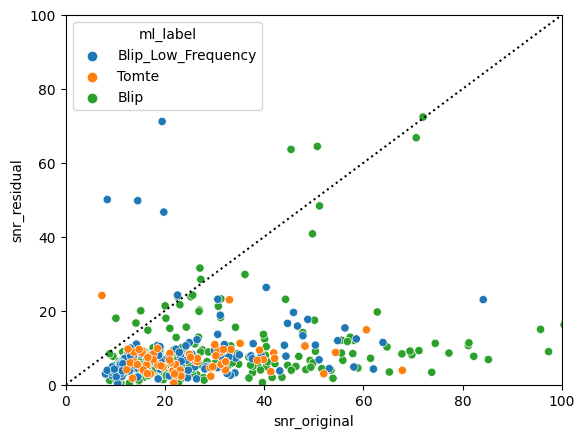

In [73]:
sns.scatterplot(df.query("ifo == 'H1' and ml_label != 'Koi_Fish'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100], c='k', ls=':')

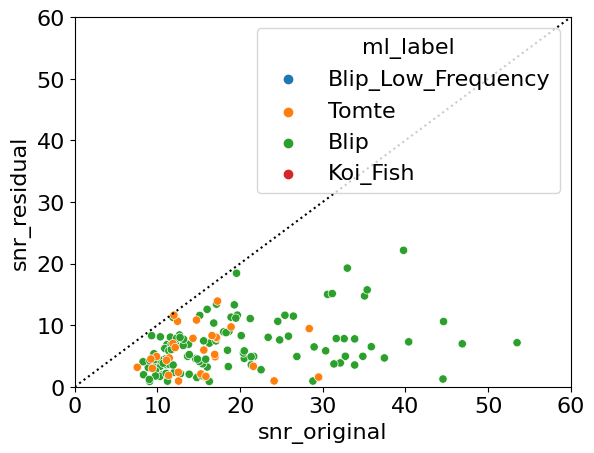

In [99]:
sns.scatterplot(df.query("ifo == 'V1' and ml_label != 'Koi_Fish'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip','Koi_Fish'])
plt.xlim(0,60)
plt.ylim(0,60)
plt.plot([0,100],[0,100], c='k', ls=':')

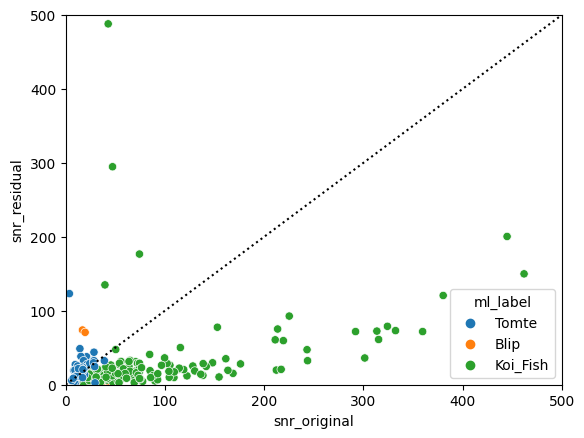

In [100]:
sns.scatterplot(df.query("ifo == 'V1'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Tomte','Blip','Koi_Fish'])
plt.xlim(0,500)
plt.ylim(0,500)
plt.plot([0,500],[0,500], c='k', ls=':')

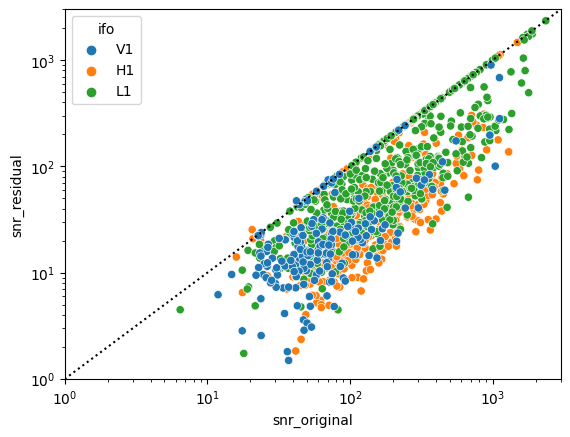

In [107]:
sns.scatterplot(df1.query("ml_label == 'Koi_Fish'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ifo', hue_order=['V1', 'H1', 'L1'])
plt.xlim(1,3000)
plt.ylim(1,3000)
plt.plot([1,3000],[1,3000], c='k', ls=':')
plt.xscale('log')
plt.yscale('log')

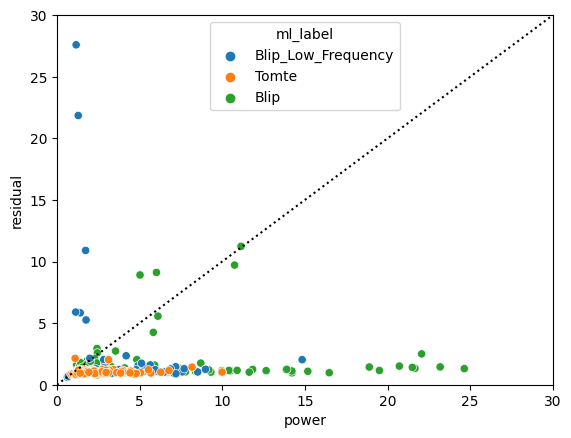

In [63]:
sns.scatterplot(df.query("ifo == 'H1' and ml_label != 'Koi_Fish'"),
                    x = 'power', y='residual',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,30)
plt.ylim(0,30)
plt.plot([0,30],[0,30], c='k', ls=':')

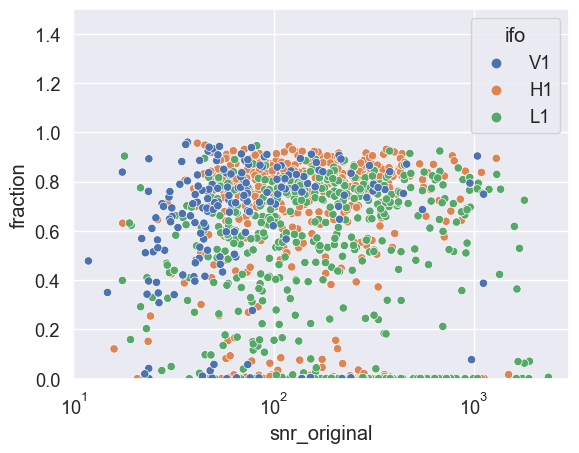

In [207]:
sns.scatterplot(df1.query("ml_label == 'Koi_Fish'"),
                    x = 'snr_original', y='fraction',
                    hue='ifo', hue_order=['V1', 'H1', 'L1'])
plt.xlim(10,3000)
plt.ylim(0,1.5)
plt.xscale('log')

/var/folders/9r/2rjfr67j39153lp1r6y1_jym0000gr/T/ipykernel_84183/3389174855.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(x_label, fontsize=20)


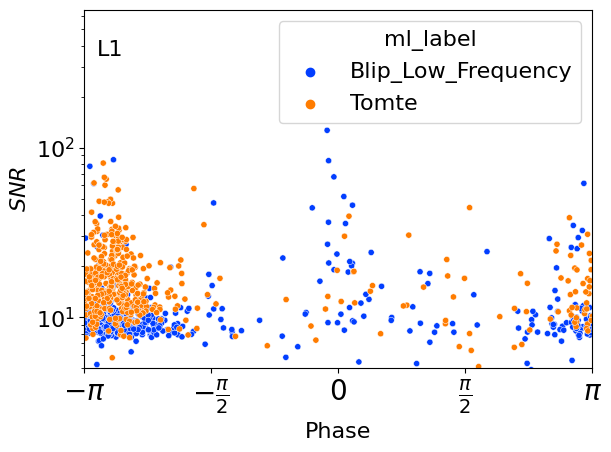

In [174]:
fig = sns.scatterplot(df.query("ifo == 'L1' and (ml_label == 'Tomte' or ml_label == 'Blip_Low_Frequency')"),
                x='phase', y='snr',
                hue='ml_label', hue_order=['Blip_Low_Frequency', 'Tomte'], s=20)
fig.set_xticklabels(x_label, fontsize=20)
plt.xlabel('Phase', fontsize=16);
plt.ylabel('$SNR$', fontsize=16);
plt.yscale('log')
plt.ylim(5,650)
plt.xlim(-1,1)
fig.text(-0.95,350, "L1")
plt.tight_layout()
plt.savefig('SNRPhaseL1.png')

/var/folders/9r/2rjfr67j39153lp1r6y1_jym0000gr/T/ipykernel_84183/1585602132.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(x_label, fontsize=20)


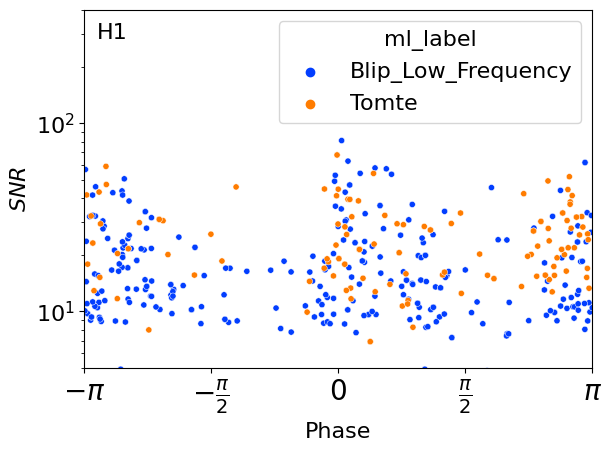

In [208]:
fig = sns.scatterplot(df.query("ifo == 'H1' and (ml_label == 'Tomte' or ml_label == 'Blip_Low_Frequency')"),
                x='phase', y='snr',
                hue='ml_label', hue_order=['Blip_Low_Frequency', 'Tomte'], s=20)
fig.set_xticklabels(x_label, fontsize=20)
plt.xlabel('Phase', fontsize=16);
plt.ylabel('$SNR$', fontsize=16);
plt.yscale('log')
plt.ylim(5,400)
plt.xlim(-1,1)
fig.text(-0.95,280, "H1")
plt.tight_layout()
plt.savefig('SNRPhaseH1.png')

/var/folders/9r/2rjfr67j39153lp1r6y1_jym0000gr/T/ipykernel_84183/2288529960.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(x_label, fontsize=20)


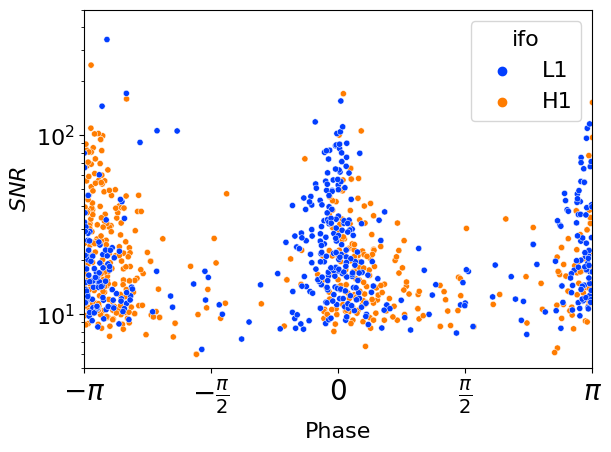

In [221]:
fig = sns.scatterplot(df.query("ifo != 'V1' and (ml_label == 'Blip')"),
                x='phase', y='snr',
                hue='ifo', hue_order=['L1','H1'], s=20)
fig.set_xticklabels(x_label, fontsize=20)
plt.xlabel('Phase', fontsize=16);
plt.ylabel('$SNR$', fontsize=16);
plt.yscale('log')
plt.ylim(5,500)
plt.xlim(-1,1)
#fig.text(-0.95,280, "H1")
plt.tight_layout()
plt.savefig('SNRPhaseH1L1blip.png')

/var/folders/9r/2rjfr67j39153lp1r6y1_jym0000gr/T/ipykernel_84183/1786709190.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(x_label, fontsize=20)


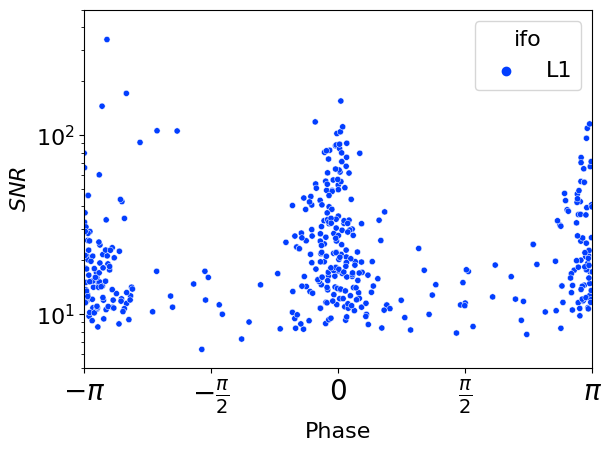

In [223]:
fig = sns.scatterplot(df.query("ifo == 'L1' and (ml_label == 'Blip')"),
                x='phase', y='snr',
                hue='ifo', hue_order=['L1'], s=20)
fig.set_xticklabels(x_label, fontsize=20)
plt.xlabel('Phase', fontsize=16);
plt.ylabel('$SNR$', fontsize=16);
plt.yscale('log')
plt.ylim(5,500)
plt.xlim(-1,1)
#fig.text(-0.95,280, "H1")
plt.tight_layout()
plt.savefig('SNRPhaseL1blip.png')

/var/folders/9r/2rjfr67j39153lp1r6y1_jym0000gr/T/ipykernel_84183/3828124031.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(x_label, fontsize=20)


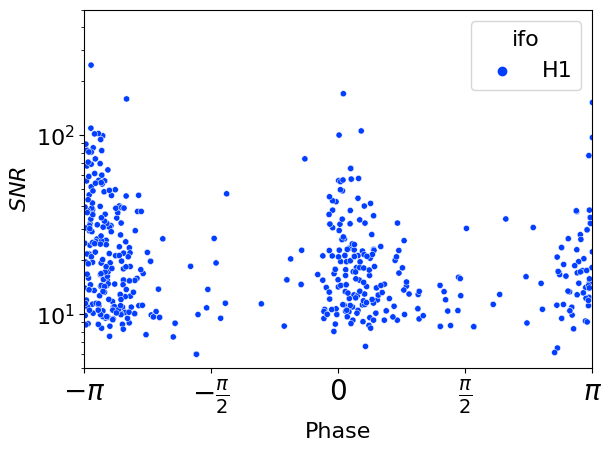

In [225]:
fig = sns.scatterplot(df.query("ifo == 'H1' and (ml_label == 'Blip')"),
                x='phase', y='snr',
                hue='ifo', hue_order=['H1'], s=20)
fig.set_xticklabels(x_label, fontsize=20)
plt.xlabel('Phase', fontsize=16);
plt.ylabel('$SNR$', fontsize=16);
plt.yscale('log')
plt.ylim(5,500)
plt.xlim(-1,1)
#fig.text(-0.95,280, "H1")
plt.tight_layout()
plt.savefig('SNRPhaseL1blip.png')

/var/folders/9r/2rjfr67j39153lp1r6y1_jym0000gr/T/ipykernel_84183/2450815991.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(x_label, fontsize=20)


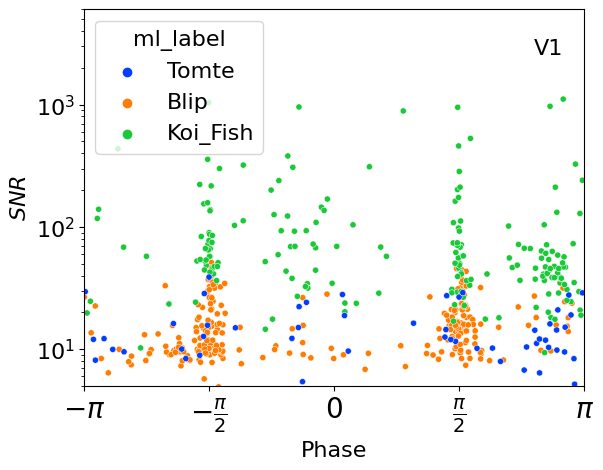

In [207]:
fig = sns.scatterplot(df.query("ifo == 'V1'"),
                x='phase', y='snr',
                hue='ml_label', hue_order=ml_types[:-1], s=20)
plt.yscale('log')
plt.ylim(5,6000)
plt.xlabel('Phase', fontsize=16);
plt.ylabel('$SNR$', fontsize=16);
plt.yscale('log')
plt.xlim(-1,1)
fig.text(0.8,2580, "V1")
plt.tight_layout()
fig.set_xticklabels(x_label, fontsize=20)
plt.savefig('SNRPhaseV1.png')

In [137]:
x_tick = np.linspace(-1, 1, 5)
# x_label = [r"$" + format(r, ".2g")+ r"\pi$" for r in y_tick]
x_label = [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$",r"$\pi$"]

(0.0, 500.0)

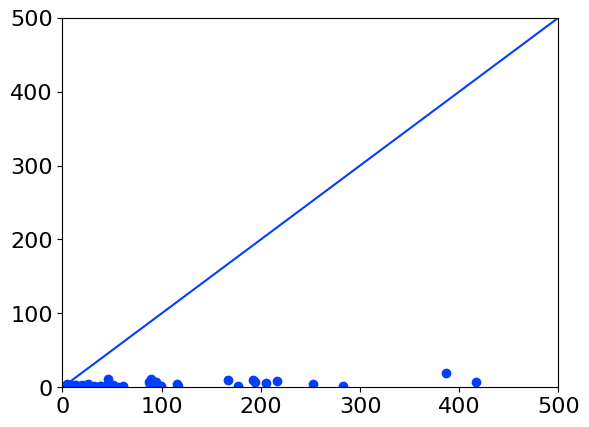

In [105]:
dt = df.query("ifo == 'V1' and ml_label == 'Koi_Fish'")
plt.scatter(dt['power']-1., dt['residual']-1.)
plt.plot([0,500],[0,500])
plt.xlim(0,500)
plt.ylim(0,500)

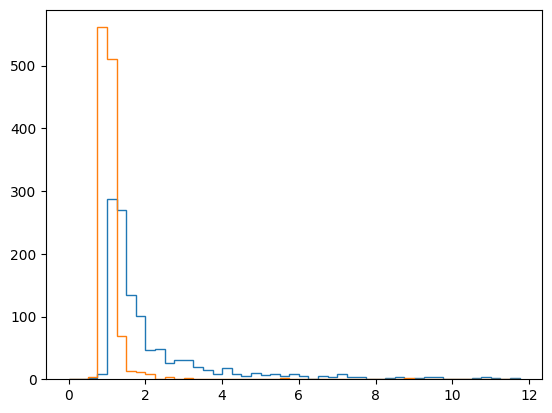

In [60]:
plt.hist(df.query("ml_label == 'Blip'")['power'], bins=np.arange(0,12,0.25), histtype='step');
plt.hist(df.query("ml_label == 'Blip'")['residual'], bins=np.arange(0,12,0.25), histtype='step');

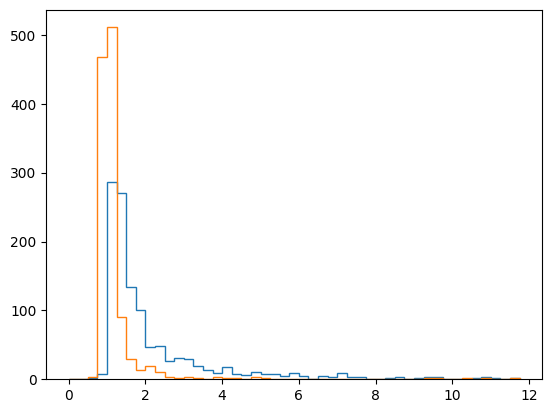

In [217]:
plt.hist(df.query("ml_label == 'Blip'")['power'], bins=np.arange(0,12,0.25), histtype='step');
plt.hist(df.query("ml_label == 'Blip'")['residual'], bins=np.arange(0,12,0.25), histtype='step');

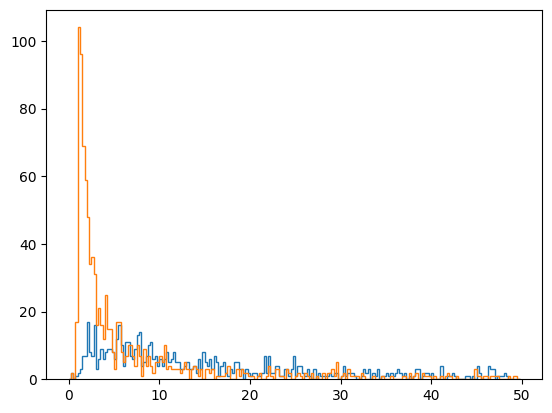

In [218]:
plt.hist(df.query("ml_label == 'Koi_Fish'")['power'], bins=np.arange(0,50,0.25), histtype='step');
plt.hist(df.query("ml_label == 'Koi_Fish'")['residual'], bins=np.arange(0,50,0.25), histtype='step');

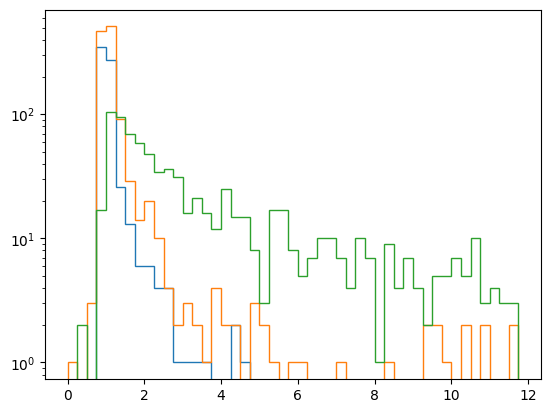

In [219]:
plt.hist(df.query("ml_label == 'Tomte'")['residual'], bins=np.arange(0,12,0.25), histtype='step', log=True);
plt.hist(df.query("ml_label == 'Blip'")['residual'], bins=np.arange(0,12,0.25), histtype='step', log=True);
plt.hist(df.query("ml_label == 'Koi_Fish'")['residual'], bins=np.arange(0,12,0.25), histtype='step', log=True);

(7.0, 20000.0)

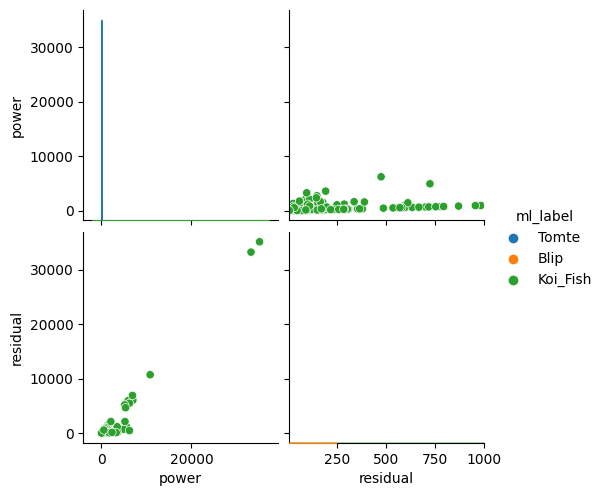

In [220]:
sns.pairplot(df.loc[df['ifo'] == 'L1'],
                vars=['power','residual'],
                hue='ml_label', hue_order=ml_types)
plt.xlim(10,1000)
plt.ylim(7,2e4)

(7, 20000.0)

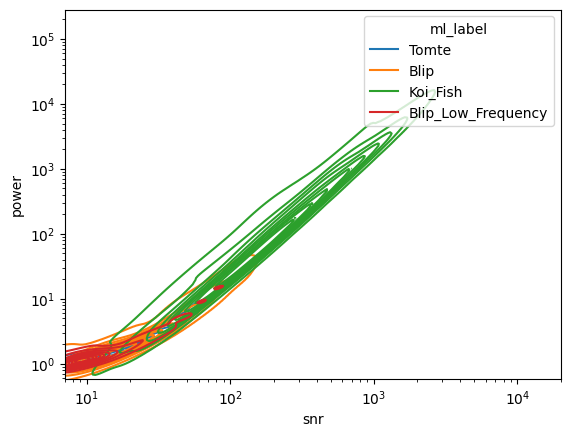

In [18]:
sns.kdeplot(df.loc[df['ifo'] == 'L1'],
                x='snr', y='power',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
plt.xlim(7,2e4)

<AxesSubplot: xlabel='power', ylabel='residual'>

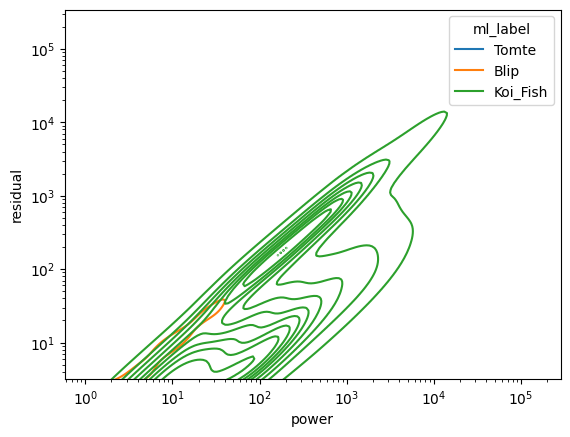

In [172]:
sns.kdeplot(df.loc[df['ifo'] == 'L1'],
                x='power', y='residual',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)

(5, 2000.0)

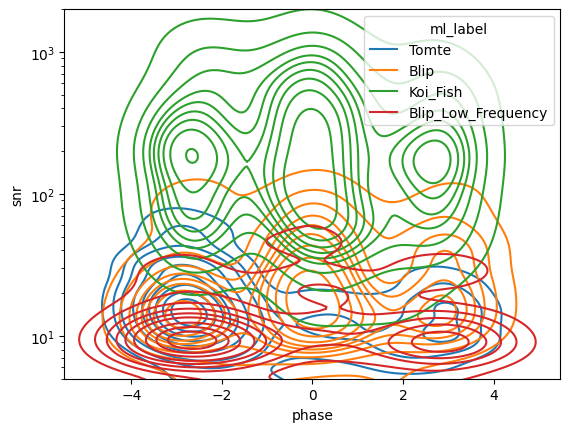

In [271]:
sns.kdeplot(df.loc[df['ifo'] == 'L1'],
                x='phase', y='snr',
                hue='ml_label', hue_order=ml_types,
                log_scale=(False,True), common_norm=False)
plt.ylim(5,2e3)

(-4000.0, 4000.0)

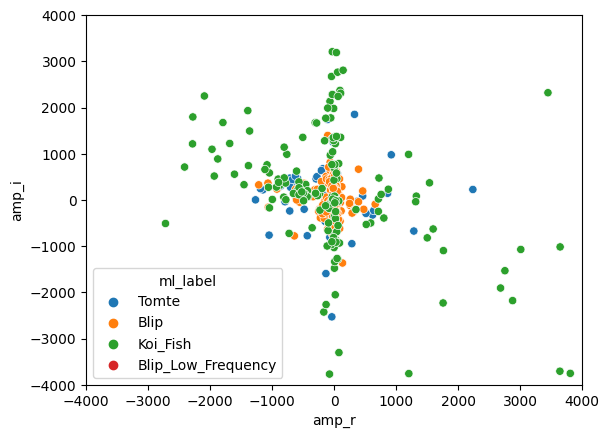

In [45]:
sns.scatterplot(df.loc[df['ifo'] == 'V1'],
                x='amp_r', y='amp_i',
                hue='ml_label', hue_order=ml_types)
plt.xlim(-4e3,4e3)
plt.ylim(-4e3,4e3)

(5, 2000.0)

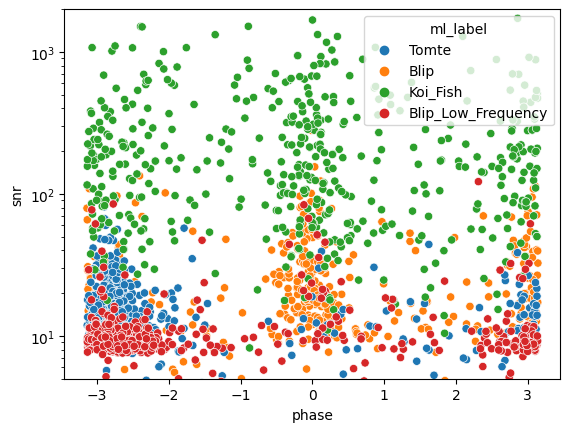

In [272]:
sns.scatterplot(df.loc[df['ifo'] == 'L1'],
                x='phase', y='snr',
                hue='ml_label', hue_order=ml_types)
plt.yscale('log')
plt.ylim(5,2e3)

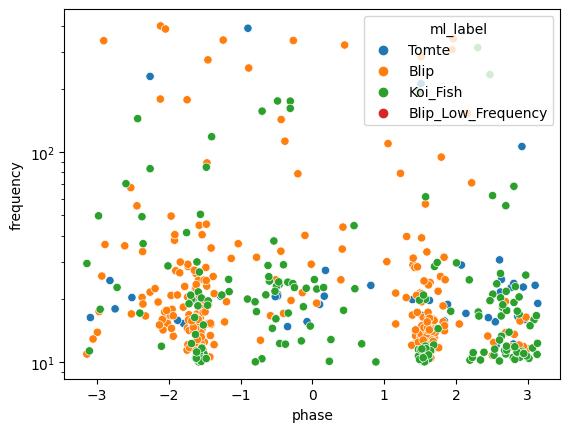

In [310]:
sns.scatterplot(df.loc[df['ifo'] == 'V1'],
                x='phase', y='frequency',
                hue='ml_label', hue_order=ml_types)
plt.yscale('log')

(5, 2000.0)

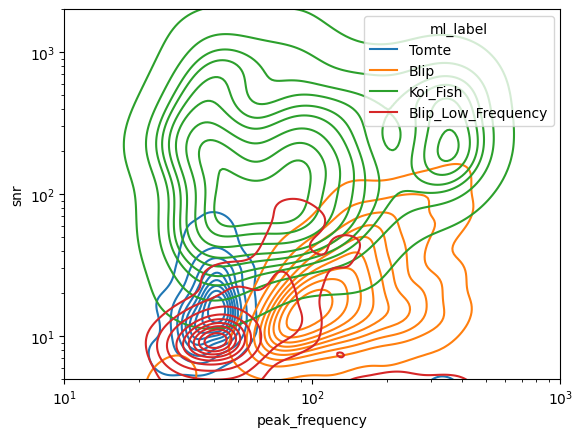

In [273]:
sns.kdeplot(df.loc[df['ifo'] == 'L1'],
                x='peak_frequency', y='snr',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(5,2e3)

(5, 2000.0)

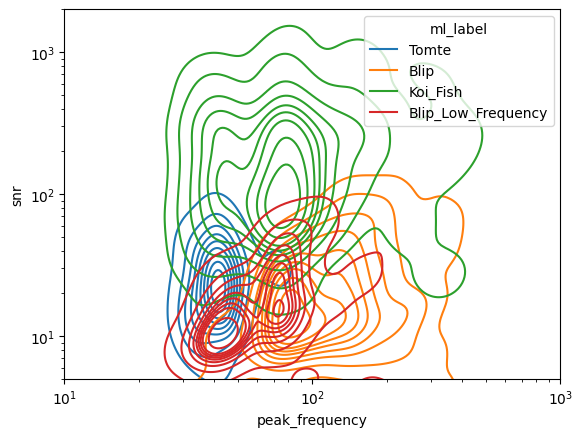

In [275]:
sns.kdeplot(df.loc[df['ifo'] == 'H1'],
                x='peak_frequency', y='snr',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(5,2e3)

(5, 2000.0)

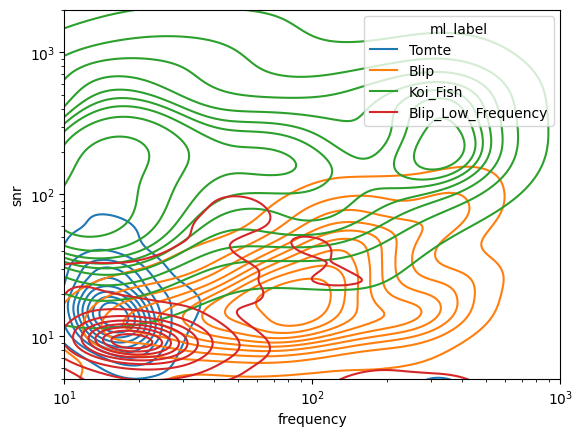

In [276]:
sns.kdeplot(df.loc[df['ifo'] == 'L1'],
                x='frequency', y='snr',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(5,2e3)

(5, 2000.0)

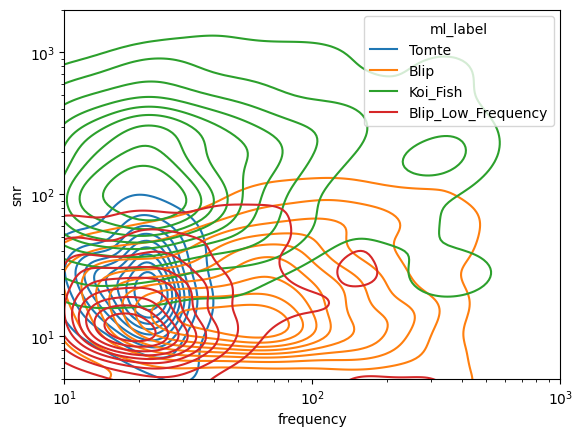

In [277]:
sns.kdeplot(df.loc[df['ifo'] == 'H1'],
                x='frequency', y='snr',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(5,2e3)

(0.25, 8)

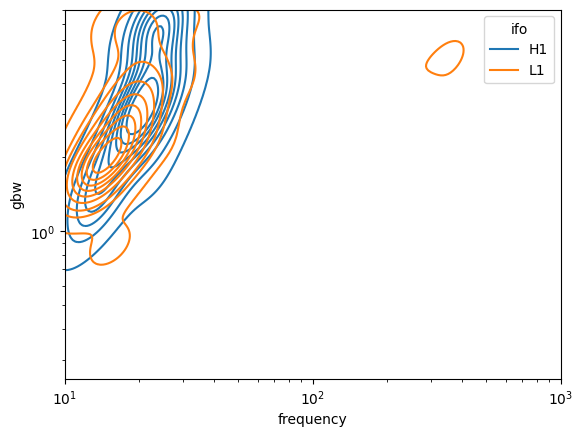

In [282]:
sns.kdeplot(df.query("ml_label == 'Tomte'"),
                x='frequency', y='gbw',
                hue='ifo',
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(0.25,8)

(0.25, 8)

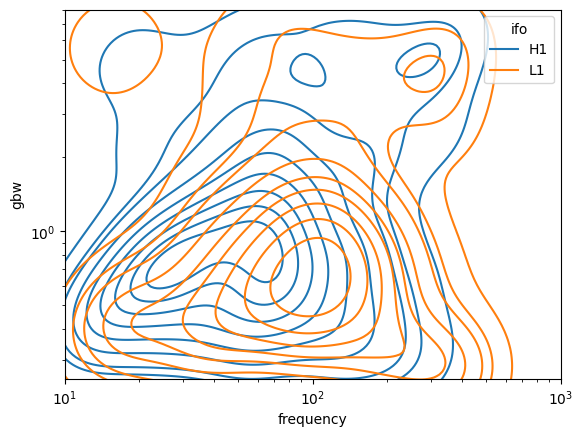

In [283]:
sns.kdeplot(df.query("ml_label == 'Blip'"),
                x='frequency', y='gbw',
                hue='ifo',
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(0.25,8)

(0.25, 8)

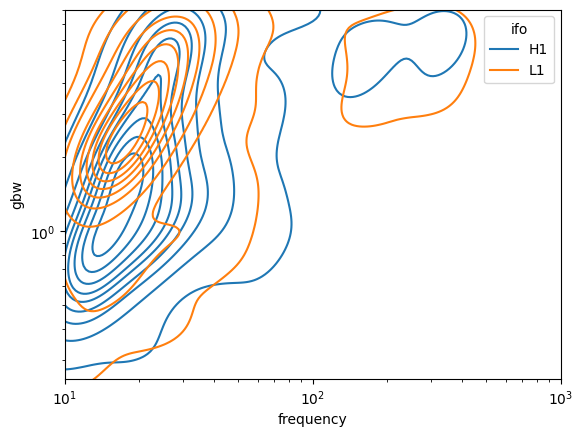

In [285]:
sns.kdeplot(df.query("ml_label == 'Blip_Low_Frequency'"),
                x='frequency', y='gbw',
                hue='ifo',
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(0.25,8)

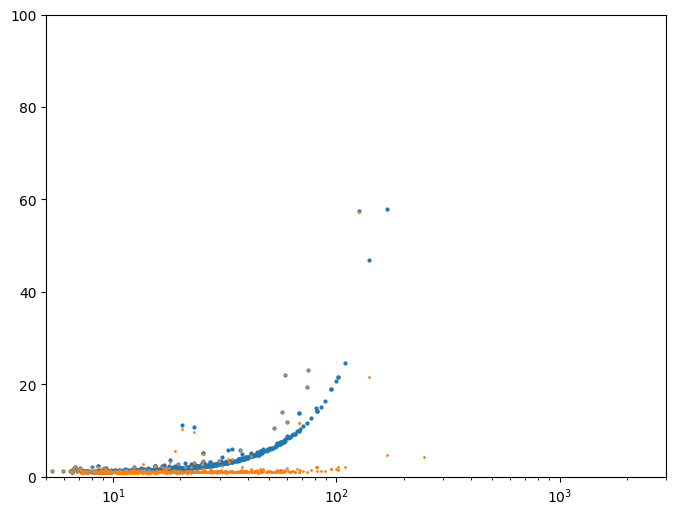

In [34]:
dt = df.query("ifo == 'H1' and not ml_label == 'Koi_Fish'")
plt.figure(figsize=(8,6))
plt.scatter(dt['snr'], dt['power'], s=4)
plt.scatter(dt['snr'], dt['residual'], s=1)
plt.xlim(5,3000)
plt.ylim(0, 100)
plt.xscale('log')

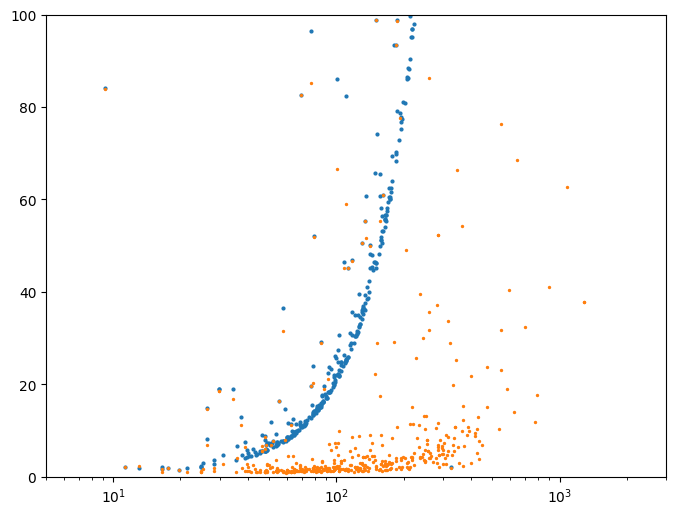

In [33]:
dt = df.query("ifo == 'H1' and ml_label == 'Koi_Fish'")
plt.figure(figsize=(8,6))
plt.scatter(dt['snr'], dt['power'], s=4)
plt.scatter(dt['snr'], dt['residual'], s=2)
plt.xlim(5,3000)
plt.ylim(0, 100)
plt.xscale('log')